# EDA and Feature Engineering for Numerical Data


In [10]:
%config InlineBackend.figure_format='retina'
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.WARNING)
print(eKonf.__version__)

0.1.31+9.gb3d564c.dirty


In [11]:
data_dir = "../data/fomc"
save_dataframe = eKonf.partial(
    config_group="_func_/save_dataframe", output_dir=data_dir
)
load_dataframe = eKonf.partial(config_group="_func_/load_dataframe", data_dir=data_dir)

## Load preprocessed data


In [12]:
econ_data = load_dataframe(data_file="econ_data2.parquet")
econ_data.tail()


unscheduled  forecast  confcall        speaker  rate  rate_change  \
date                                                                            
2021-11-03        False     False     False  Jerome Powell  0.25         0.00   
2021-12-15        False      True     False  Jerome Powell  0.25         0.00   
2022-01-26        False     False     False  Jerome Powell  0.25         0.00   
2022-03-16        False      True     False  Jerome Powell  0.50         0.25   
2022-05-04        False     False     False  Jerome Powell  1.00         0.50   

            rate_decision  rate_changed        GDP  GDP_diff_prev  ...  Rate  \
date                                                               ...         
2021-11-03            0.0             0  19478.893       0.570948  ...  0.25   
2021-12-15            0.0             0  19478.893       0.570948  ...  0.25   
2022-01-26            0.0             0  19478.893       0.570948  ...  0.25   
2022-03-16            1.0             1  19806.290       1.680778  ...  0.25   
2022-05-04            1.0             1  19735.895      -0.355417  ...  0.50   

              Taylor  Balanced   Inertia  Taylor-Rate Balanced-Rate  \
date                                                                  
2021-11-03  5.747177  4.940210 -0.528532     5.497177      4.690210   
2021-12-15  6.472329  5.665362 -0.637304     6.222329      5.415362   
2022-01-26  7.222928  6.415961 -0.749894     6.972928      6.165961   
2022-03-16  8.499377  8.267766 -1.027665     8.249377      8.017766   
2022-05-04  8.094924  7.420939 -0.688141     7.594924      6.920939   

            Inertia-Rate  Taylor_diff  Balanced_diff Inertia_diff  
date                                                               
2021-11-03     -0.778532          0.0            0.0          0.0  
2021-12-15     -0.887304          0.0            0.0          0.0  
2022-01-26     -0.999894          0.0            0.0          0.0  
2022-03-16     -1.277665          0.0            0.0          0.0  
2022-05-04     -1.188141          0.0            0.0          0.0  

[5 rows x 58 columns]

## EDA on numerical data


In [13]:
# Add previous rate decision to see inertia effect
econ_data["rate_decision2"] = econ_data["rate_decision"].map(
    lambda x: -1 if x <= -1 else 1 if x >= 1 else 0
)
econ_data["prev_decision"] = econ_data["rate_decision2"].shift(1)
econ_data["next_decision"] = econ_data["rate_decision2"].shift(-1)
econ_data[["rate_decision", "rate_decision2", "prev_decision", "next_decision"]].head()


rate_decision  rate_decision2  prev_decision  next_decision
date                                                                   
1982-10-05           -1.0              -1            NaN           -1.0
1982-11-16           -1.0              -1           -1.0            0.0
1982-12-21            0.0               0           -1.0            0.0
1983-01-14            0.0               0            0.0            0.0
1983-01-21            0.0               0            0.0            0.0

In [14]:
econ_data.describe()

rate  rate_change  rate_decision  rate_changed           GDP  \
count  415.000000   415.000000     415.000000    415.000000    415.000000   
mean     3.968976    -0.019880      -0.016867      0.334940  12815.408884   
std      3.036522     0.228714       0.649939      0.472539   3719.399375   
min      0.000000    -1.000000      -2.000000      0.000000   6804.139000   
25%      1.000000     0.000000       0.000000      0.000000   9394.834000   
50%      4.000000     0.000000       0.000000      0.000000  13183.890000   
75%      6.000000     0.000000       0.000000      1.000000  15781.342000   
max     11.500000     1.125000       2.000000      1.000000  19806.290000   

       GDP_diff_prev  GDP_diff_year        GDPPOT  GDPPOT_diff_prev  \
count     415.000000     415.000000    415.000000        415.000000   
mean        0.657814       2.523898  13018.548855          0.643467   
std         1.085580       2.203739   3776.658124          0.185616   
min        -8.937251      -9.083737   7271.207419          0.318708   
25%         0.426261       1.701703   9597.373675          0.475884   
50%         0.678051       2.673107  13014.429940          0.642412   
75%         0.988107       3.908365  16227.234340          0.777802   
max         7.547535      12.226677  20003.730000          1.058177   

       GDPPOT_diff_year  ...     Inertia  Taylor-Rate  Balanced-Rate  \
count        415.000000  ...  415.000000   415.000000     415.000000   
mean           2.616803  ...    2.893358     0.005563      -0.665962   
std            0.756947  ...    2.373858     1.899151       2.141286   
min            1.303969  ...   -1.027665    -4.920215      -8.061836   
25%            1.915027  ...    0.561801    -1.470860      -1.661544   
50%            2.615226  ...    2.788555     0.052807      -0.293935   
75%            3.150223  ...    4.507101     1.361705       0.475418   
max            4.280368  ...    8.901506     8.249377       8.017766   

       Inertia-Rate  Taylor_diff  Balanced_diff  Inertia_diff  rate_decision2  \
count    415.000000   415.000000     415.000000    415.000000      415.000000   
mean      -1.097304     0.002576       0.005238     -0.002322       -0.012048   
std        0.711029     0.058706       0.088255      0.026755        0.579313   
min       -2.699376    -0.400621      -0.400621     -0.425000       -1.000000   
25%       -1.567363     0.000000       0.000000      0.000000        0.000000   
50%       -1.130361     0.000000       0.000000      0.000000        0.000000   
75%       -0.455663     0.000000       0.000000      0.000000        0.000000   
max       -0.037500     0.616857       1.233715      0.060093        1.000000   

       prev_decision  next_decision  
count     414.000000     414.000000  
mean       -0.014493      -0.009662  
std         0.577867       0.577968  
min        -1.000000      -1.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000  

[8 rows x 47 columns]

In [15]:
econ_data.isnull().sum()

unscheduled       0
forecast          0
confcall          0
speaker           0
rate              0
                 ..
Balanced_diff     0
Inertia_diff      0
rate_decision2    0
prev_decision     1
next_decision     1
Length: 61, dtype: int64

## Plot rate decision count


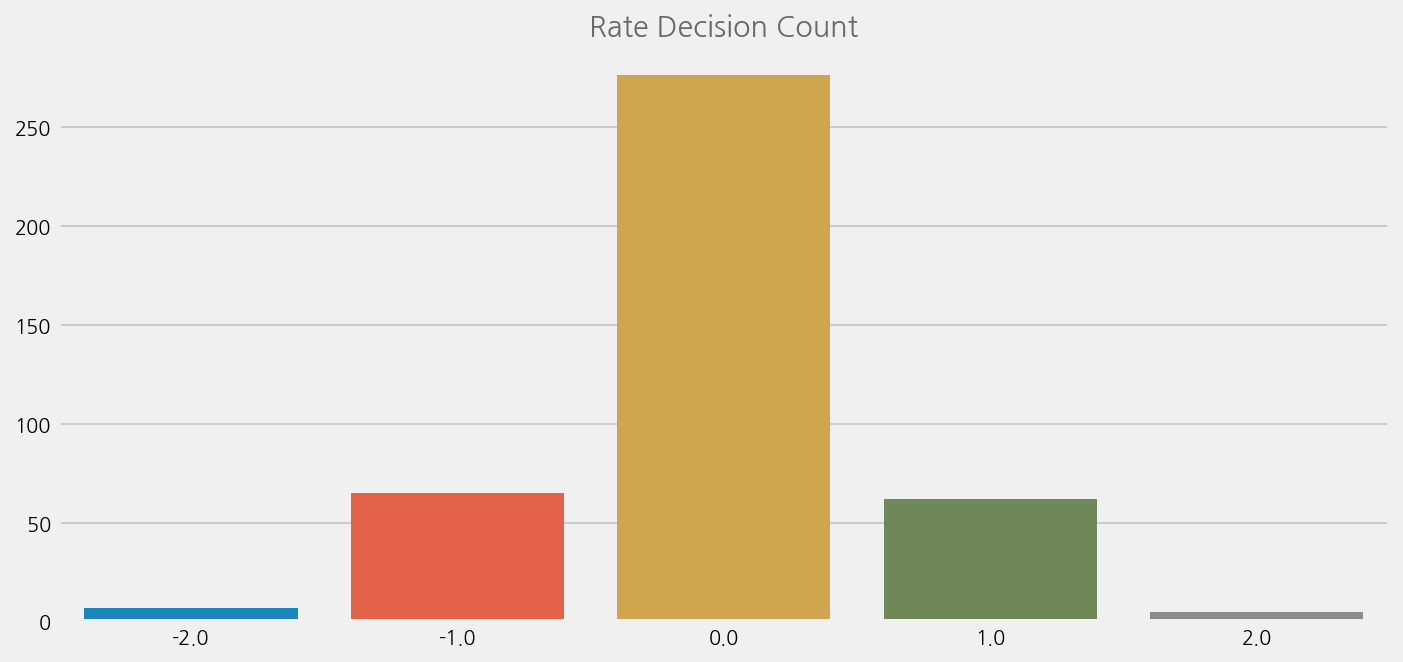

In [16]:
cfg = eKonf.compose(config_group="visualize/plot=countplot")
cfg.countplot.x = "rate_decision"
cfg.figure.figsize = (10, 5)
cfg.figure.fontsize = 10
cfg.ax.title = "Rate Decision Count"
eKonf.instantiate(cfg, data=econ_data)

Highly imbalanced to 0 (hold), so need to consider this point. Always predicting 0 (hold) will result in the accuracy of more than 60%.


## Correlation


In [17]:
corr_columns = [
    "rate_decision2",
    "next_decision",
    "prev_decision",
    "unscheduled",
    "forecast",
    "confcall",
    "GDP_diff_prev",
    "GDP_diff_year",
    "GDPPOT_diff_prev",
    "GDPPOT_diff_year",
    "PCE_diff_prev",
    "PCE_diff_year",
    "CPI_diff_prev",
    "CPI_diff_year",
    "UNEMP",
    "UNEMP_diff_prev",
    "UNEMP_diff_year",
    "EMP",
    "EMP_diff_prev",
    "EMP_diff_year",
    "PMI",
    "PMI_diff_prev",
    "PMI_diff_year",
    "RSALES_diff_prev",
    "RSALES_diff_year",
    "HSALES_diff_prev",
    "HSALES_diff_year",
    "Taylor_diff",
    "Balanced_diff",
    "Inertia_diff",
    "rate",
    "rate_change",
    "rate_changed",
]

corr_data = econ_data[corr_columns].astype(float).corr()

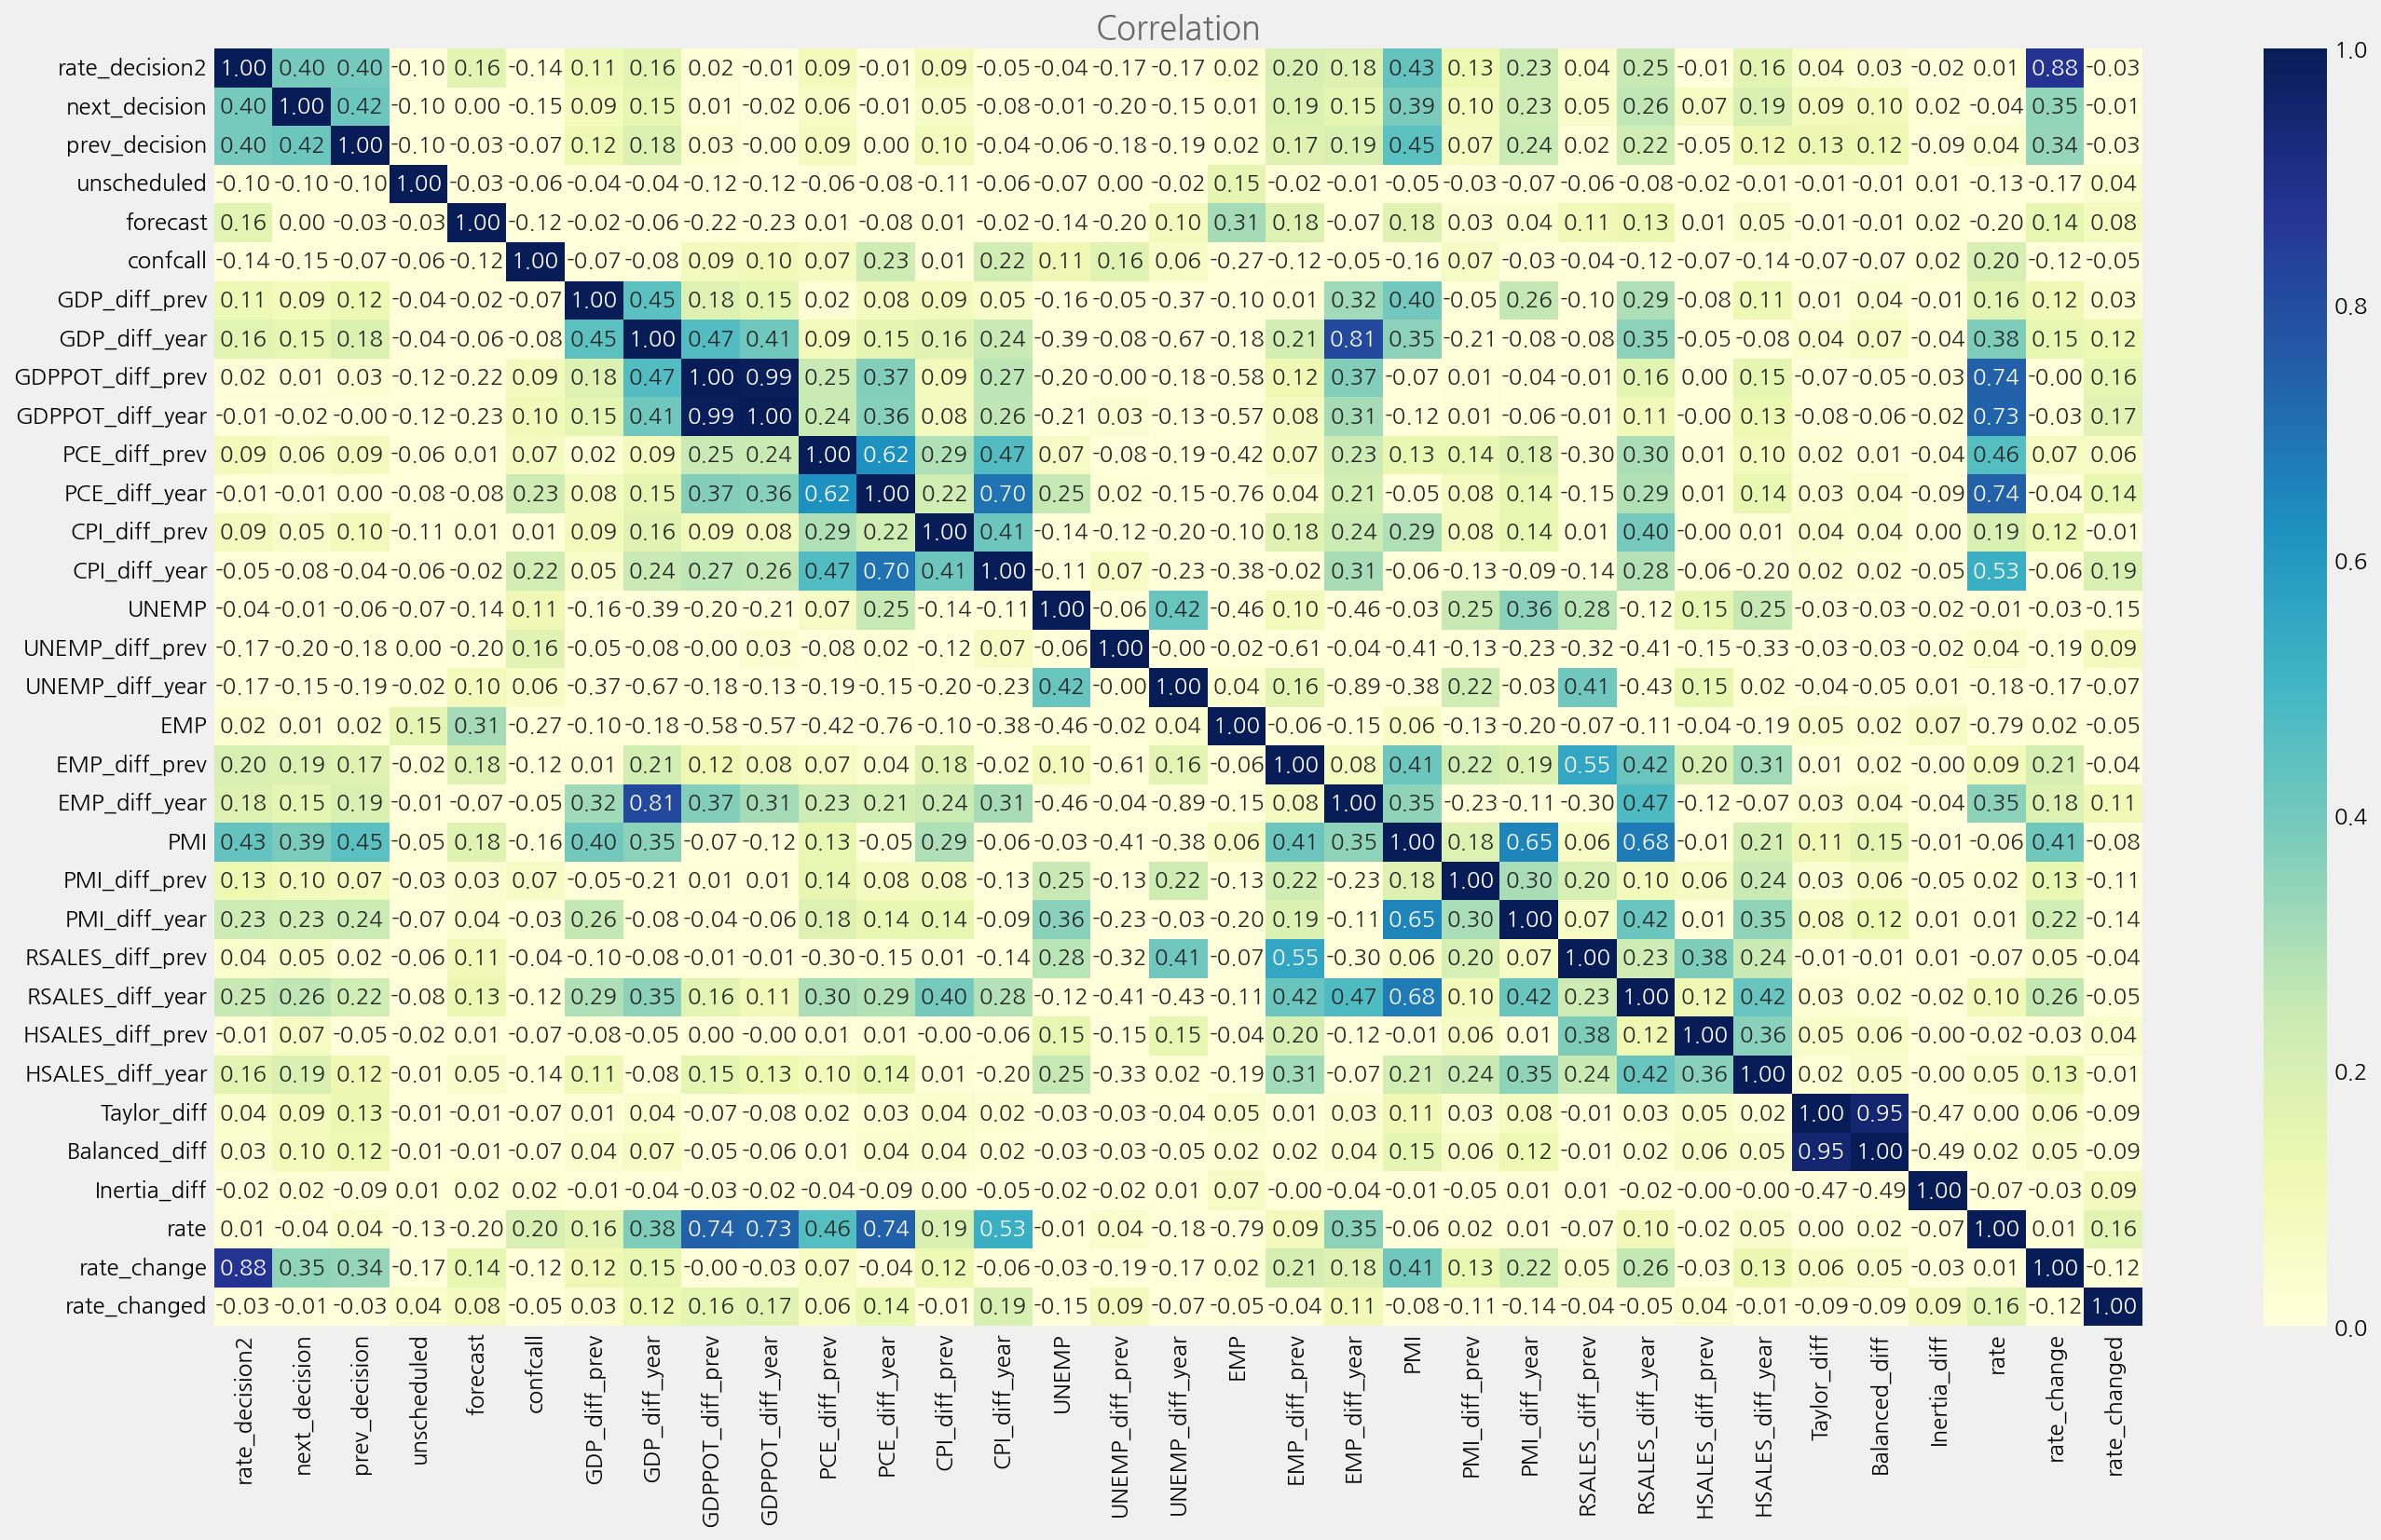

In [18]:
cfg = eKonf.compose(config_group="visualize/plot=heatmap")
cfg.figure.figsize = (20, 12)
cfg.figure.fontsize = 12
cfg.heatmap.cmap = "YlGnBu"
cfg.heatmap.vmin = 0
cfg.heatmap.vmax = 1
cfg.heatmap.fmt = ".2f"
cfg.ax.title = "Correlation"
eKonf.instantiate(cfg, data=corr_data)

Observation on the correlation:

Higher correlation with Rate Decision:

- 'GDP_diff_year'
- 'Unemp_diff_prev'
- 'Employ_diff_prev'
- 'PMI'
- 'RSALES_diff_year'
- 'HSALES_diff_year'
- 'prev_decision'

Will create two dataset, one full set and the other smaller set with high correlation


### Correlation between Taylor rule and actual rates


In [19]:
corr_columns = ["Rate", "Taylor", "Balanced", "Inertia"]
corr_data1 = econ_data[corr_columns].astype(float).corr()
corr_columns = ["rate_change", "Taylor_diff", "Balanced_diff", "Inertia_diff"]
corr_data2 = econ_data[corr_columns].astype(float).corr()

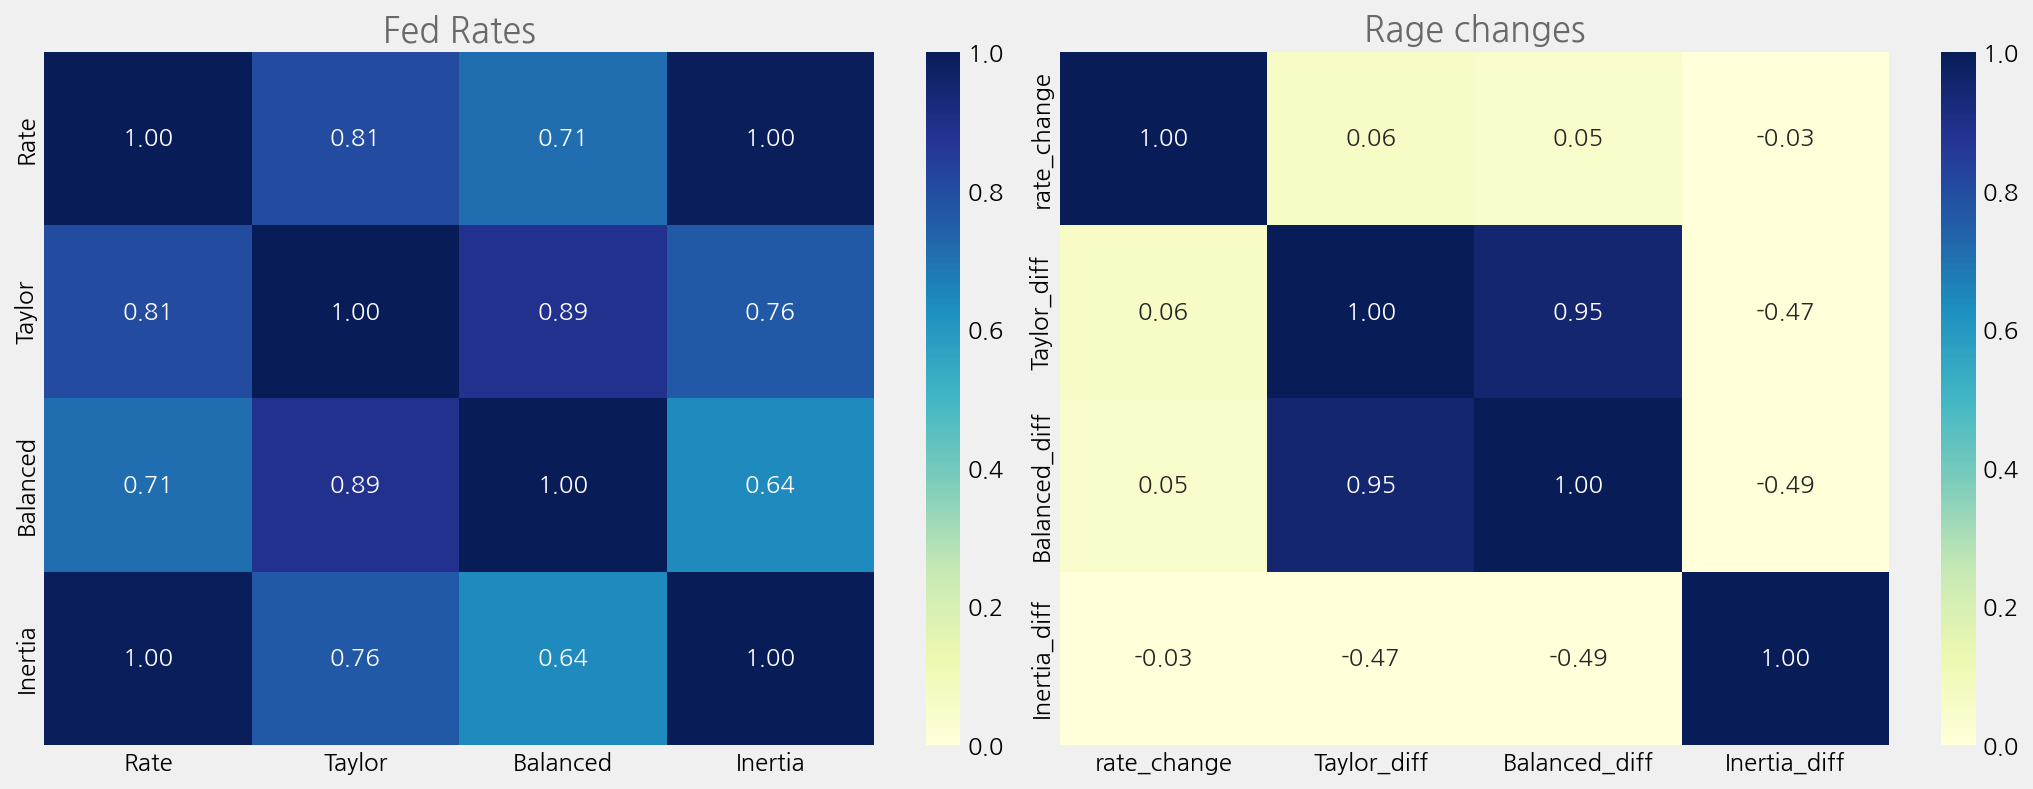

In [20]:
cfg = eKonf.compose(config_group="visualize/plot=heatmap")
cfg.figure.figsize = (15, 6)
cfg.figure.fontsize = 12
cfg.subplots.ncols = 2
cfg.subplots.nrows = 1
cfg.heatmap.axno = 0
cfg.heatmap.datano = 0
cfg.heatmap.cmap = "YlGnBu"
cfg.heatmap.vmin = 0
cfg.heatmap.vmax = 1
cfg.heatmap.fmt = ".2f"
cfg.ax.title = "Fed Rates"
cfg.ax.axno = 0
heatmap2 = cfg.heatmap.copy()
heatmap2.axno = 1
heatmap2.datano = 1
ax2 = cfg.ax.copy()
ax2.title = "Rage changes"
ax2.axno = 1
cfg.plots.append(heatmap2)
cfg.axes.append(ax2)
eKonf.instantiate(cfg, data=[corr_data1, corr_data2])

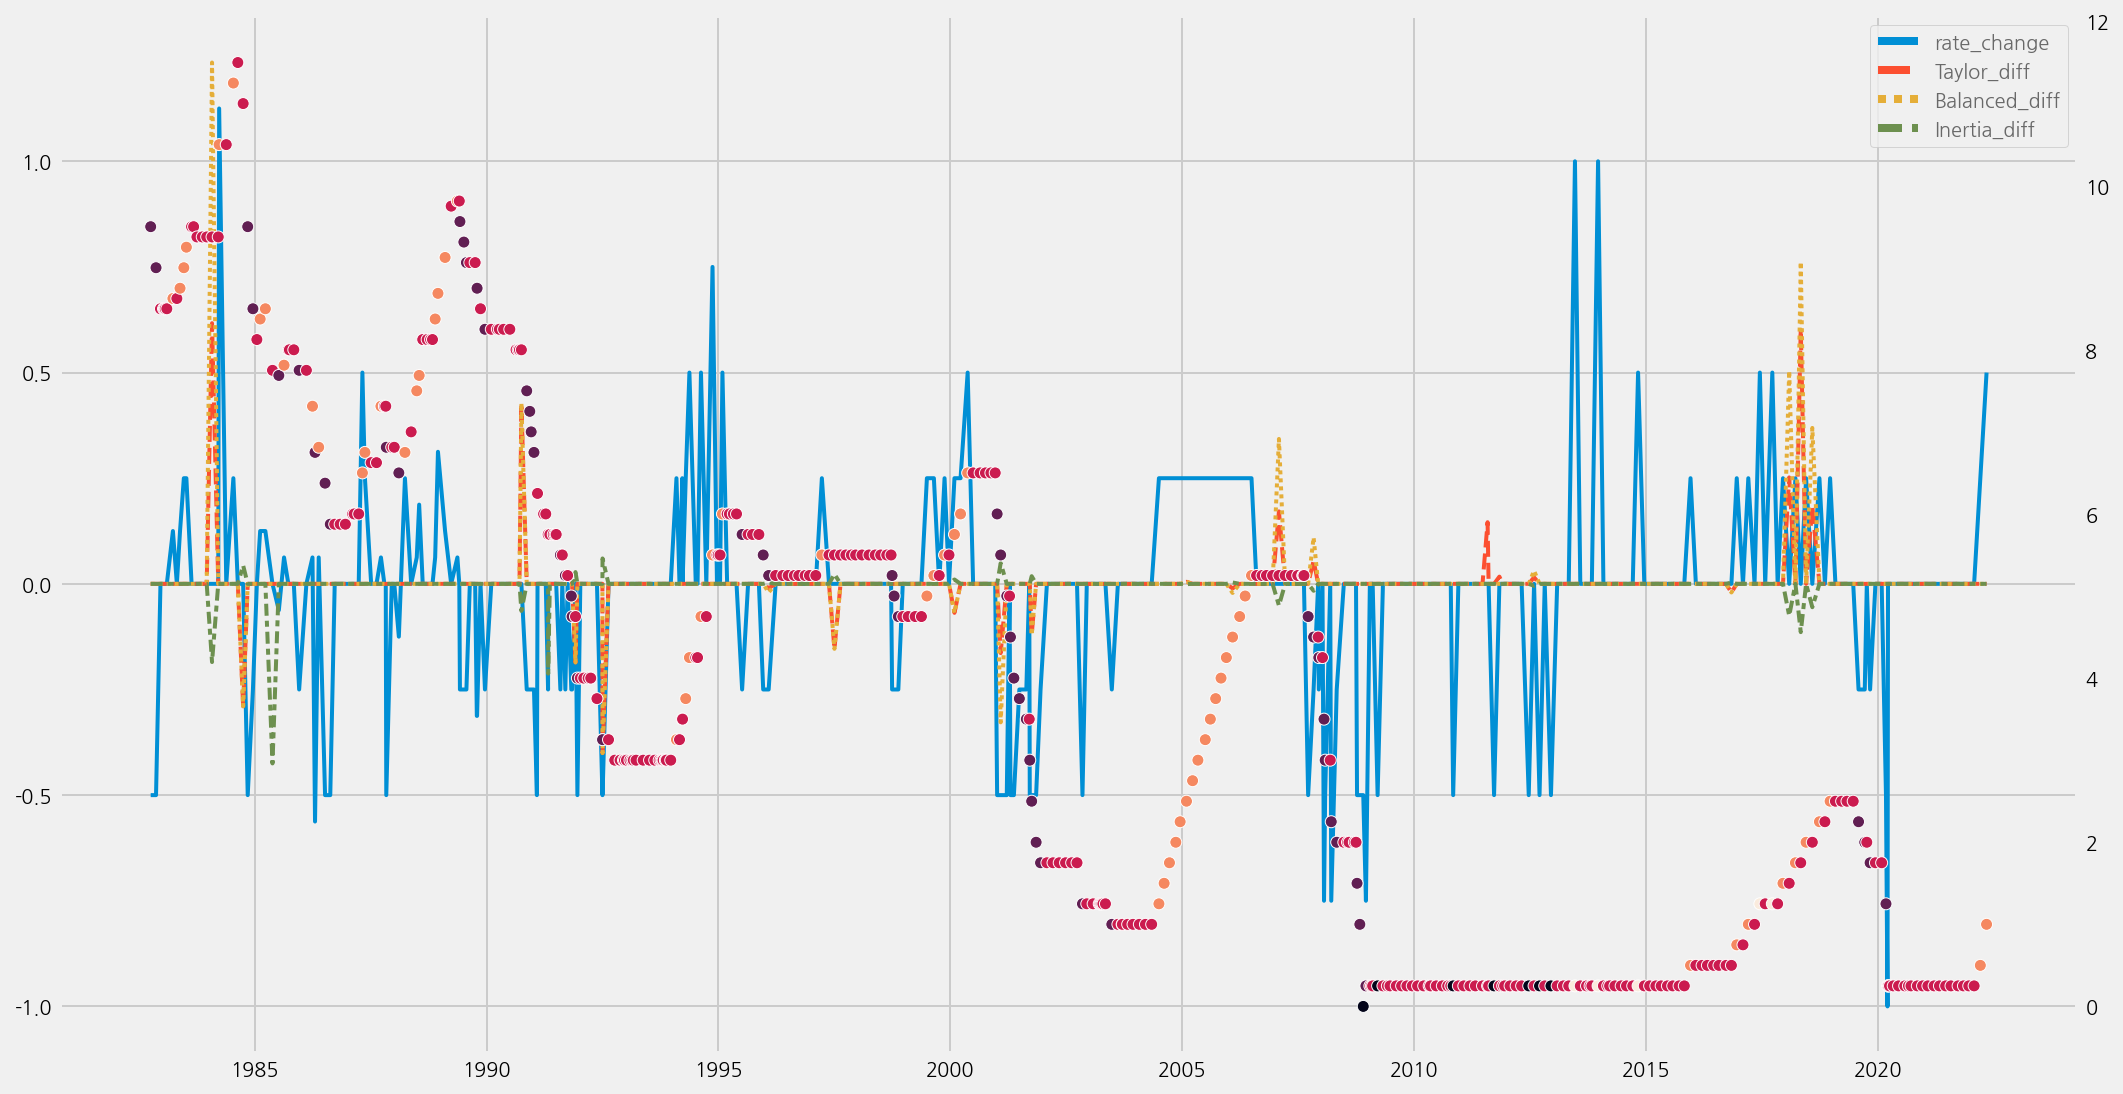

In [21]:
cfg = eKonf.compose(config_group="visualize/plot=lineplot")
cfg.figure.figsize = (15, 8)
cfg.lineplot.y = corr_columns

scatter_cfg = eKonf.compose(config_group="visualize/plot/scatter")
scatter_cfg.x = "date"
scatter_cfg.y = "rate"
scatter_cfg.hue = "rate_decision"
scatter_cfg.palette = "rocket"
scatter_cfg.secondary_y = True
cfg.plots.append(scatter_cfg)

ax2 = cfg.ax.copy()
ax2.grid = False
ax2.secondary_y = True
cfg.axes.append(ax2)

eKonf.instantiate(cfg, data=econ_data)

### Compare distribution by rate decisions


In [22]:
def plot_distribution(data, columns):
    for col in columns:
        cfg = eKonf.compose(config_group="visualize/plot=kdeplot")
        cfg.figure.figsize = (8, 4)

        cfg.kdeplot.x = col
        cfg.kdeplot.hue = "rate_decision2"
        cfg.kdeplot.palette = "tab10"
        cfg.ax.legend = ["Raise", "Hold", "Lower"]
        cfg.ax.grid = False
        cfg.ax.title = f"Distribution of {cfg.kdeplot.x}"
        cfg.ax.ylabel = "Frequency"
        cfg.ax.xlabel = cfg.kdeplot.x
        eKonf.instantiate(cfg, data=data)

        cfg = eKonf.compose(config_group="visualize/plot=facetgrid")
        cfg.figure.figsize = (8, 4)
        cfg.theme.palette = "pastel"
        cfg.facetgrid.col = "rate_decision2"
        cfg.facetgrid.height = 3
        cfg.facetgrid.map_dataframe._func_ = "histplot"
        cfg.facetgrid.map_dataframe._parms_ = dict(x=col, bins=50, kde=True)
        eKonf.instantiate(cfg, data=data)

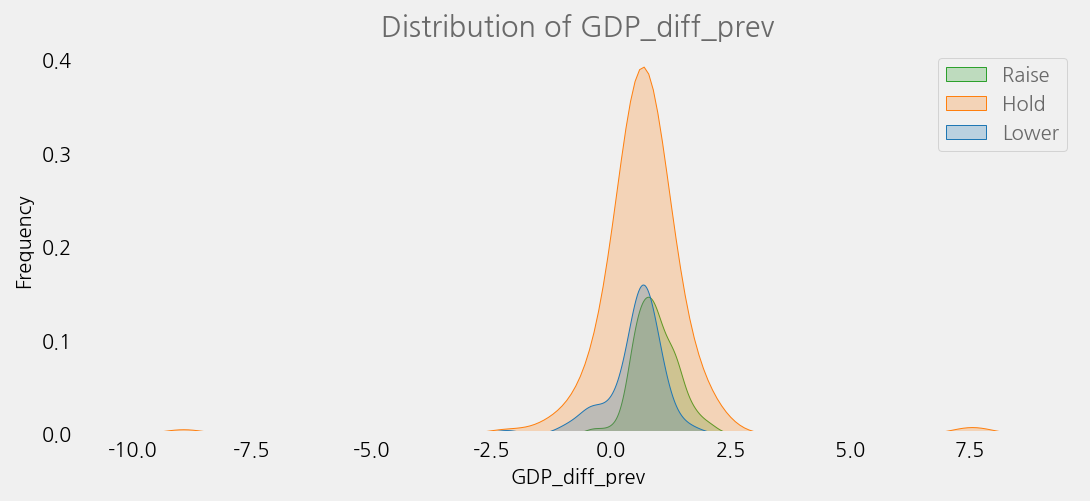

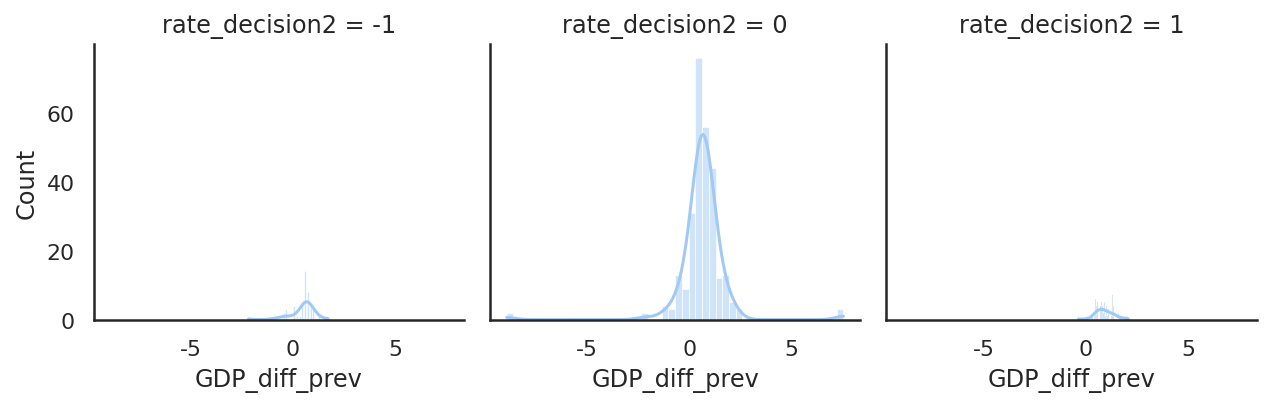

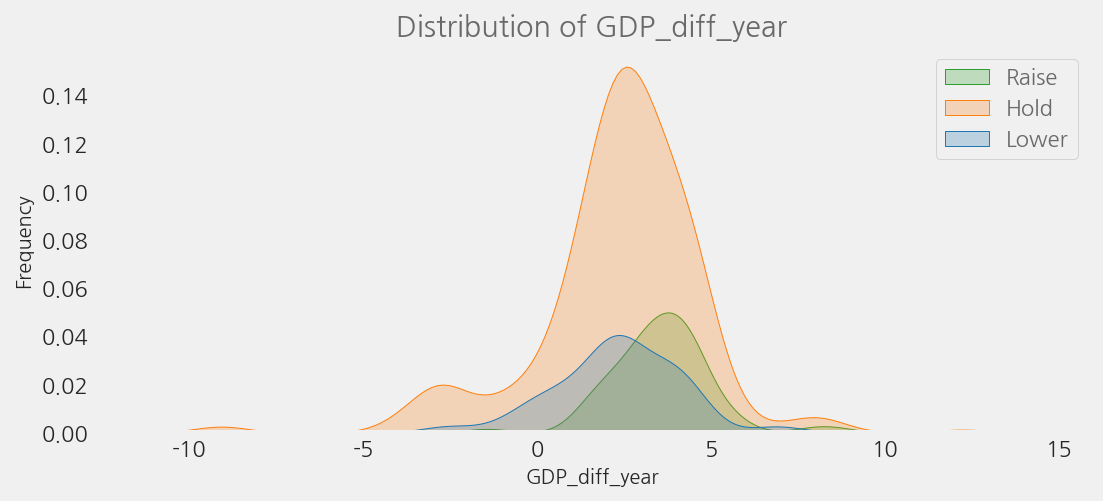

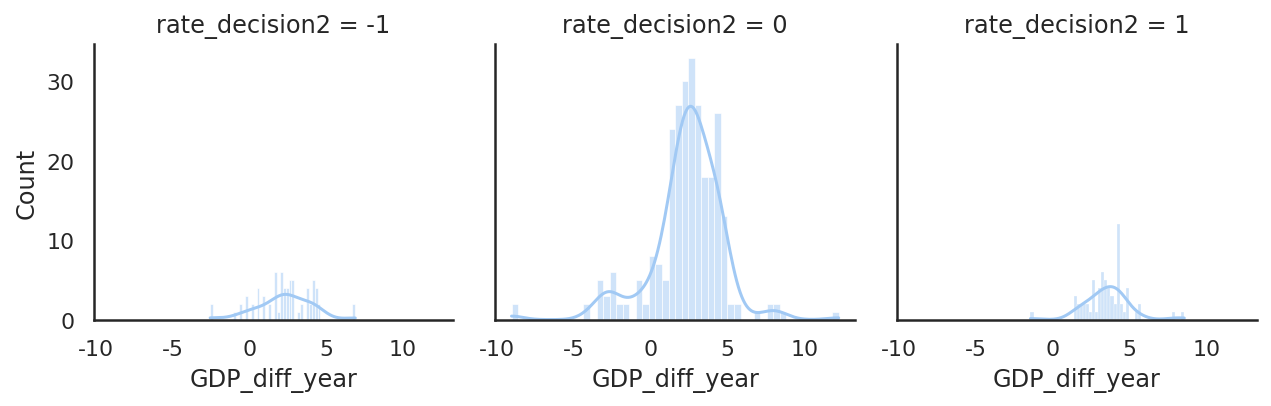

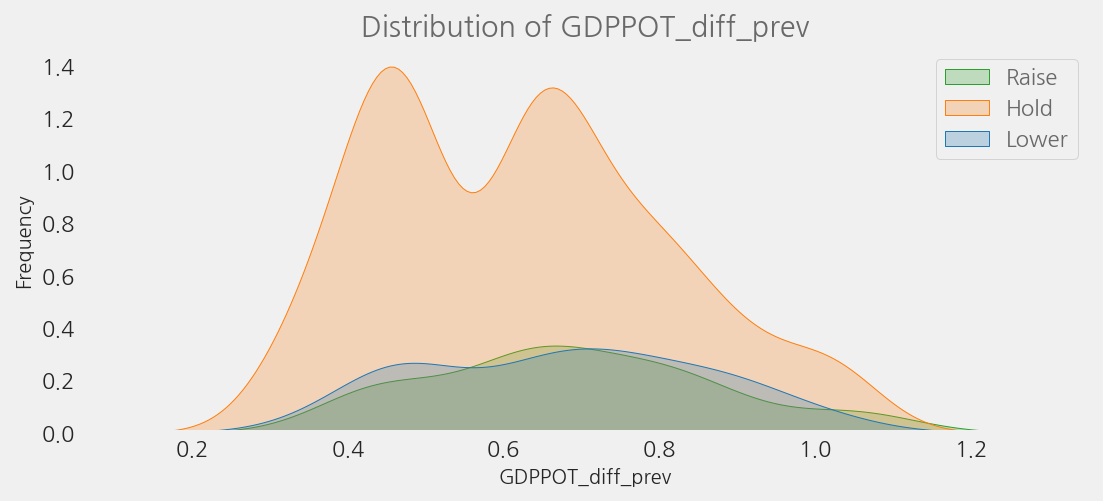

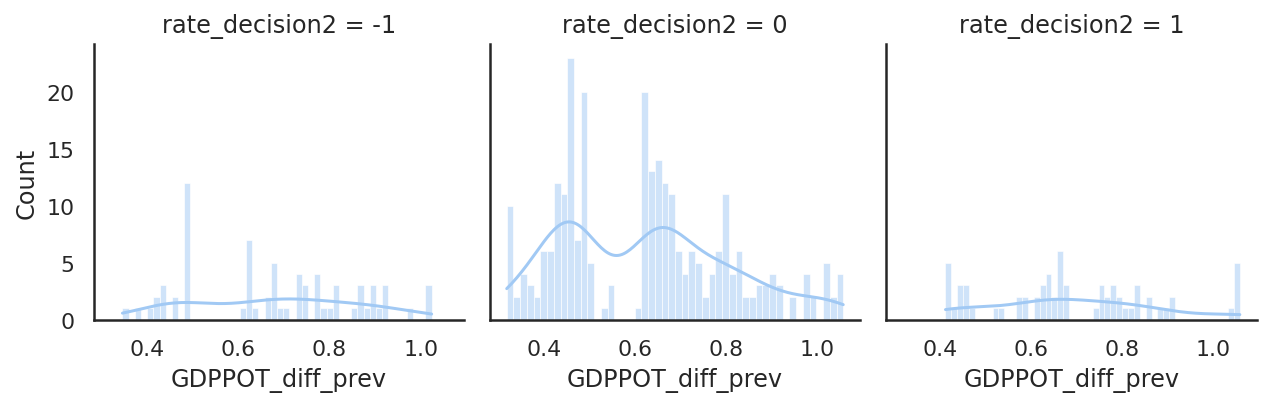

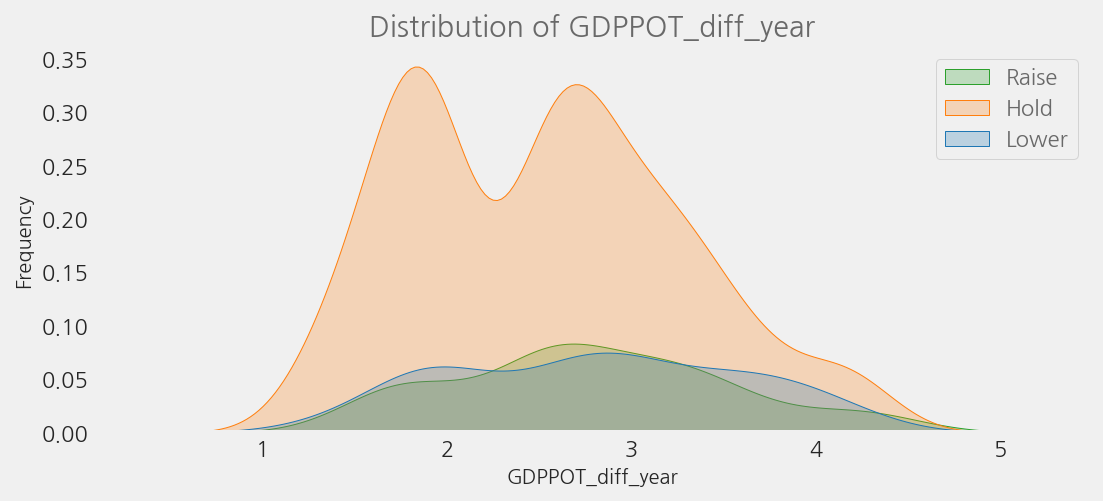

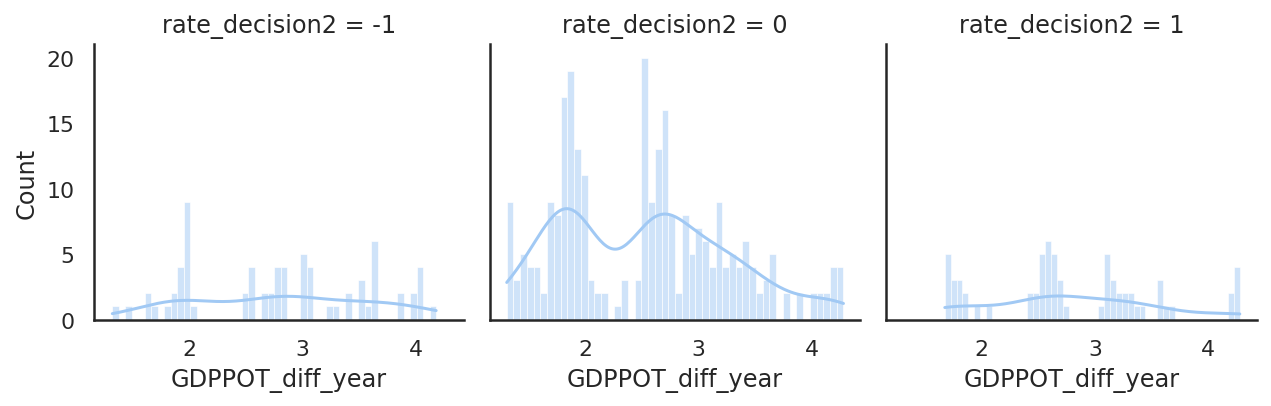

In [23]:
plot_distribution(
    econ_data,
    ["GDP_diff_prev", "GDP_diff_year", "GDPPOT_diff_prev", "GDPPOT_diff_year"],
)


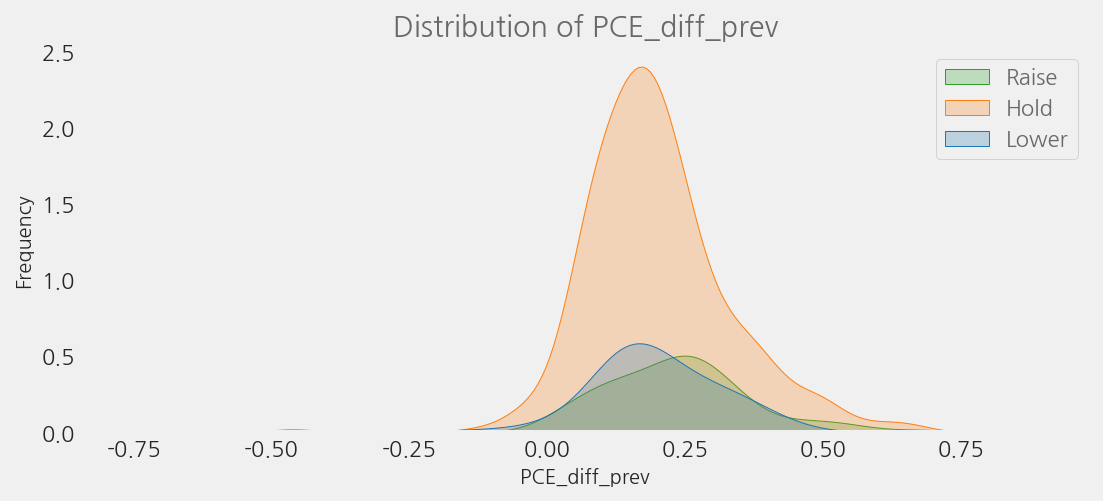

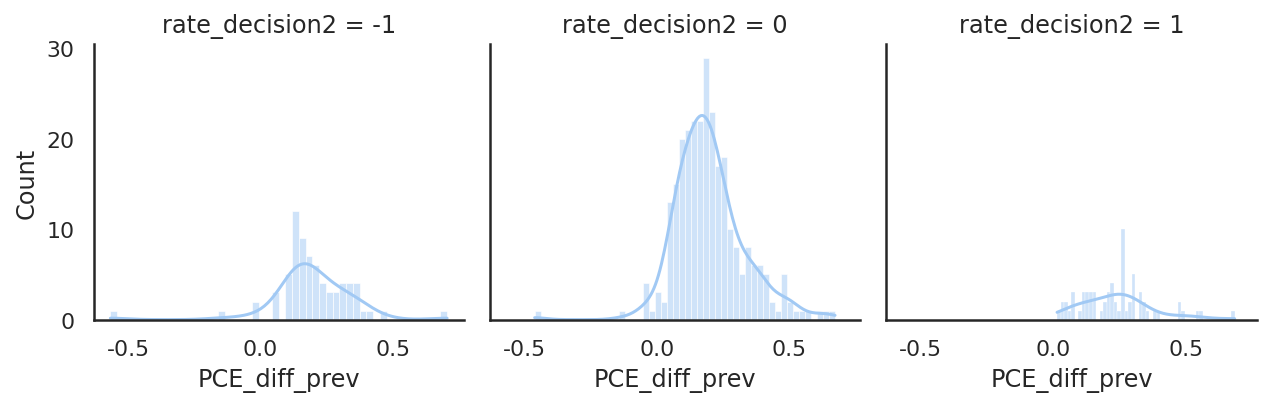

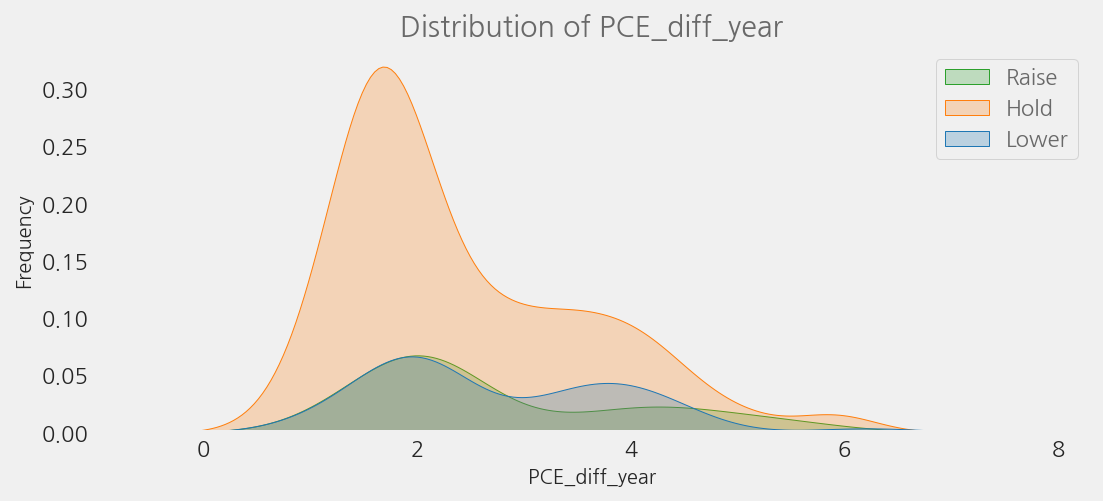

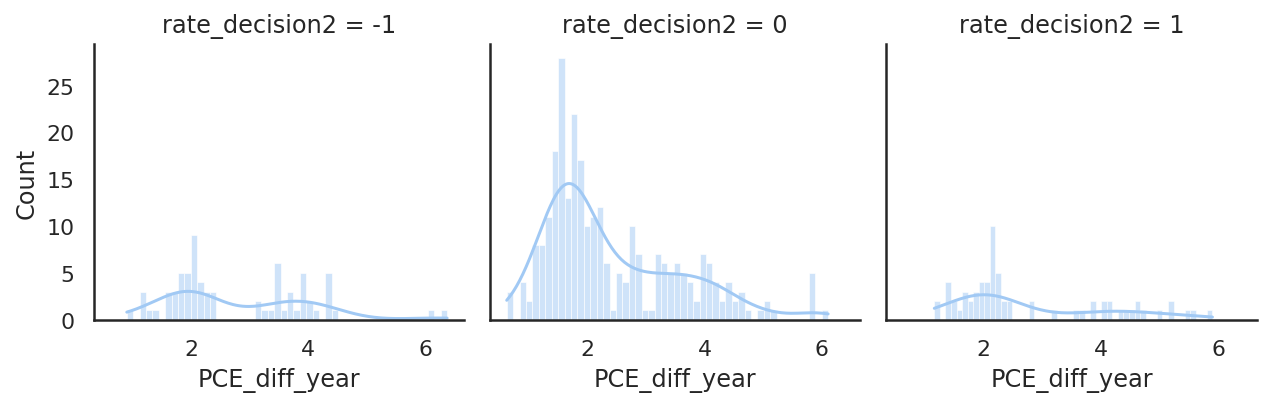

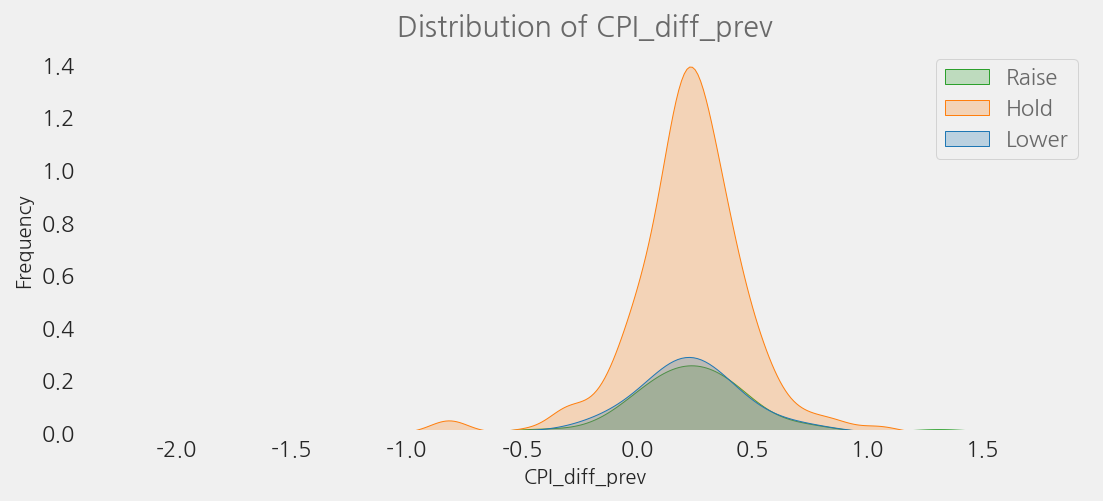

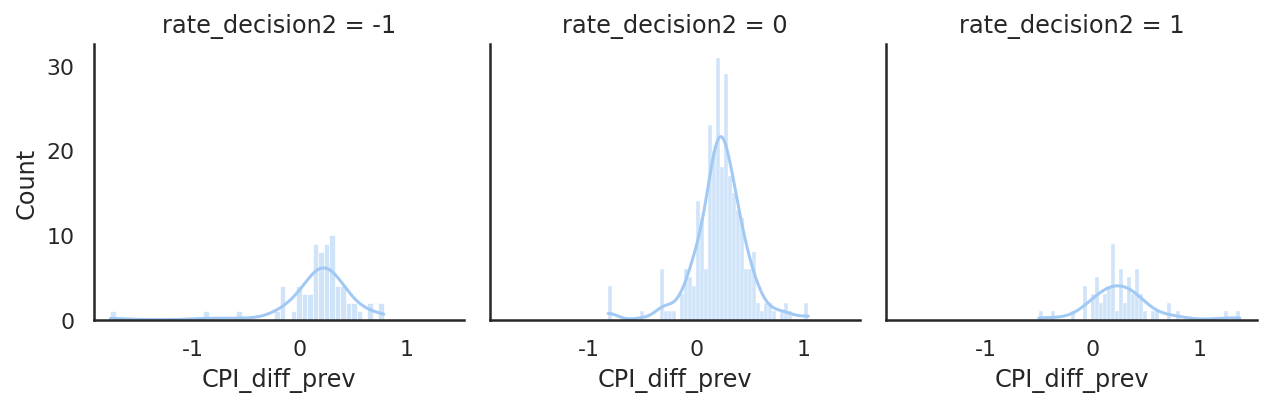

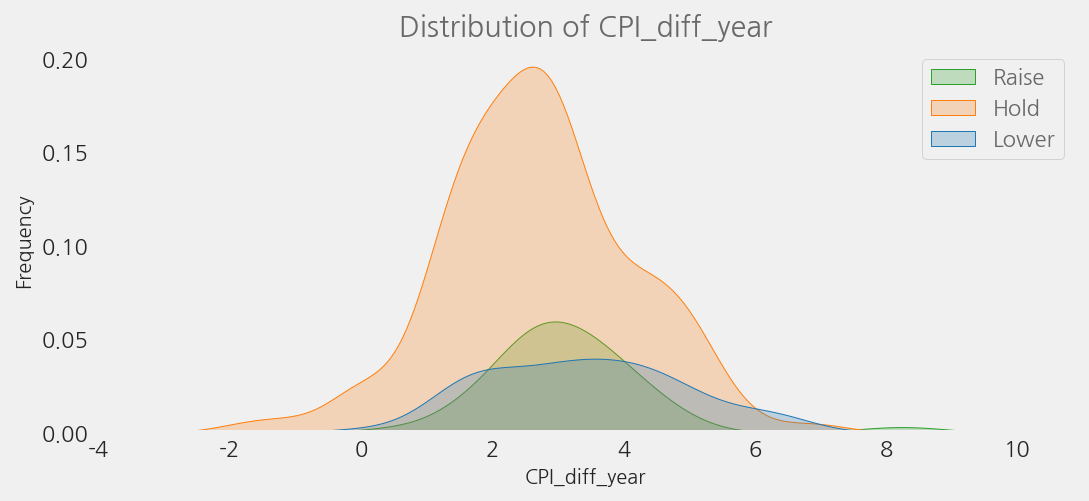

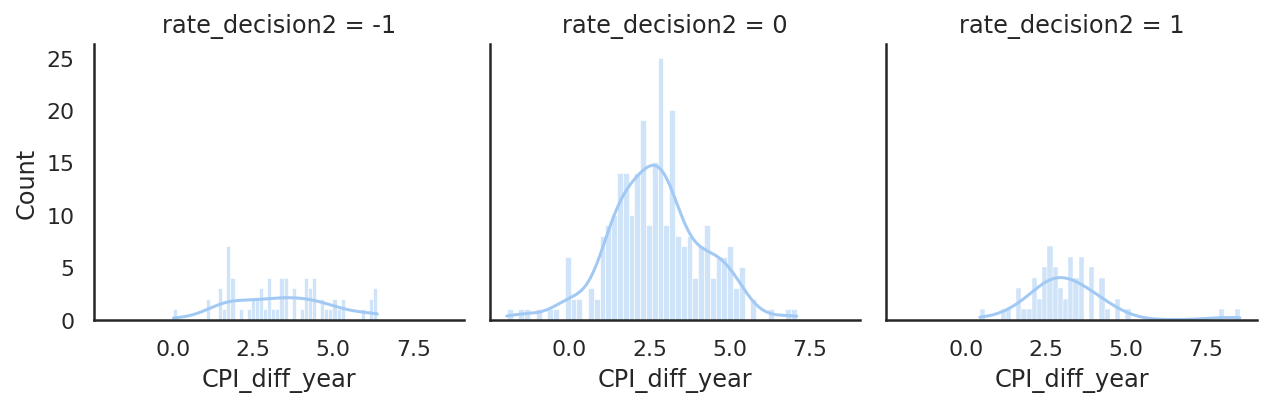

In [24]:
plot_distribution(
    econ_data, ["PCE_diff_prev", "PCE_diff_year", "CPI_diff_prev", "CPI_diff_year"]
)


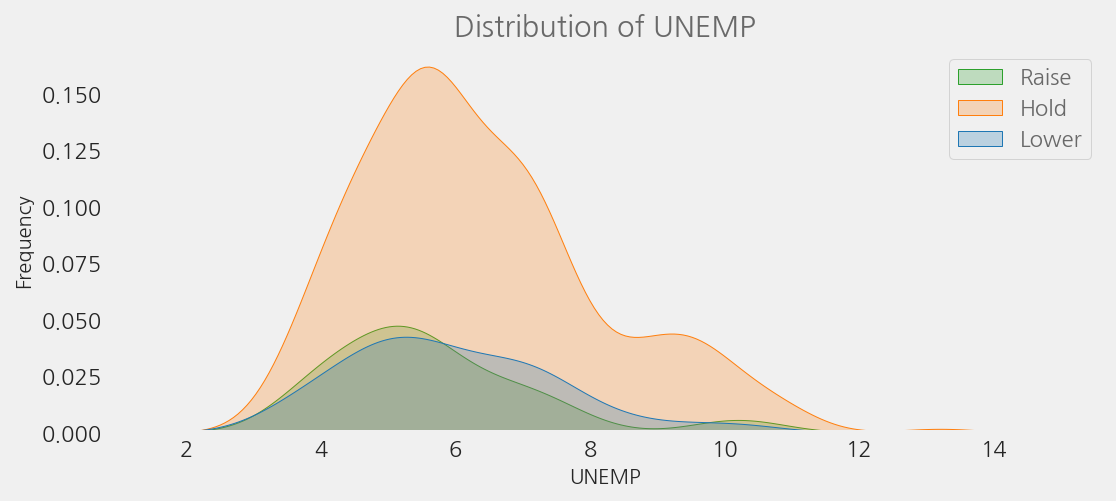

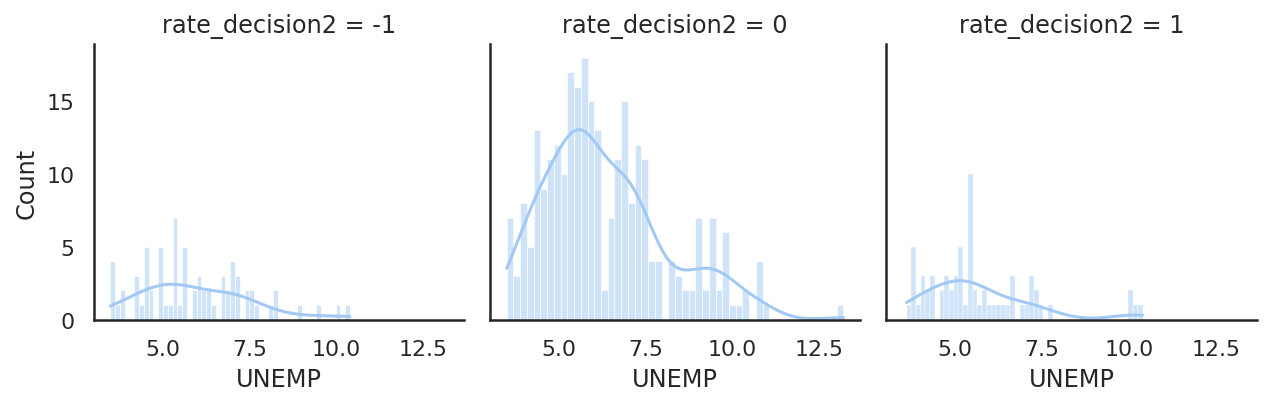

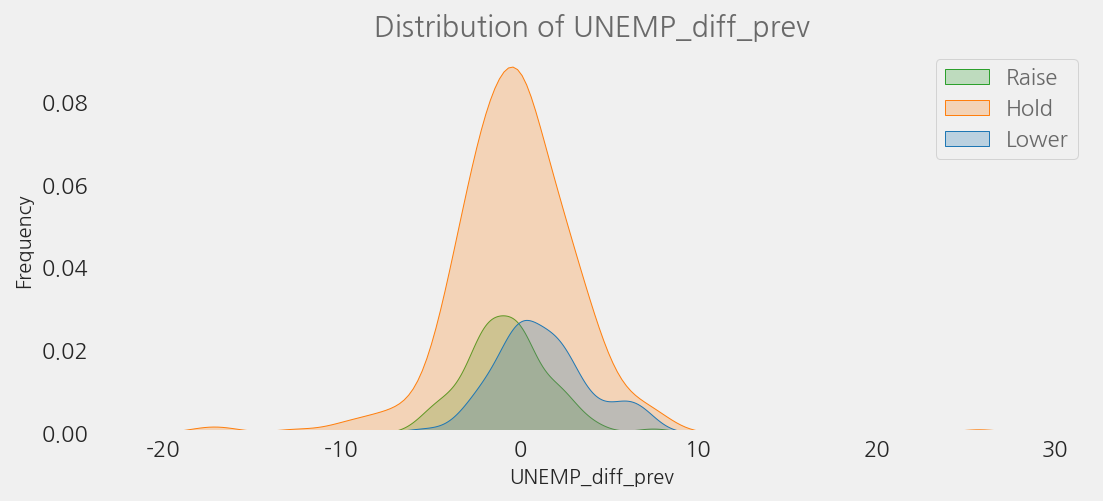

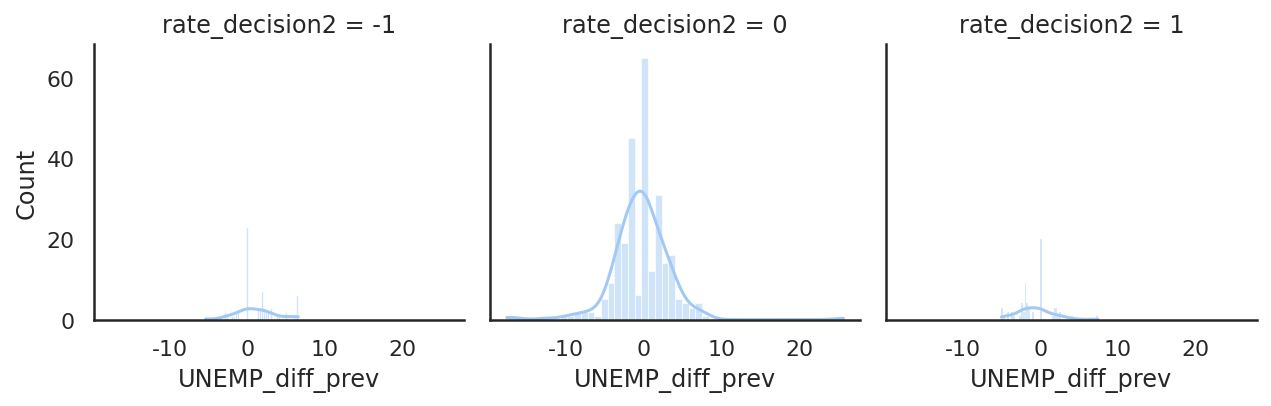

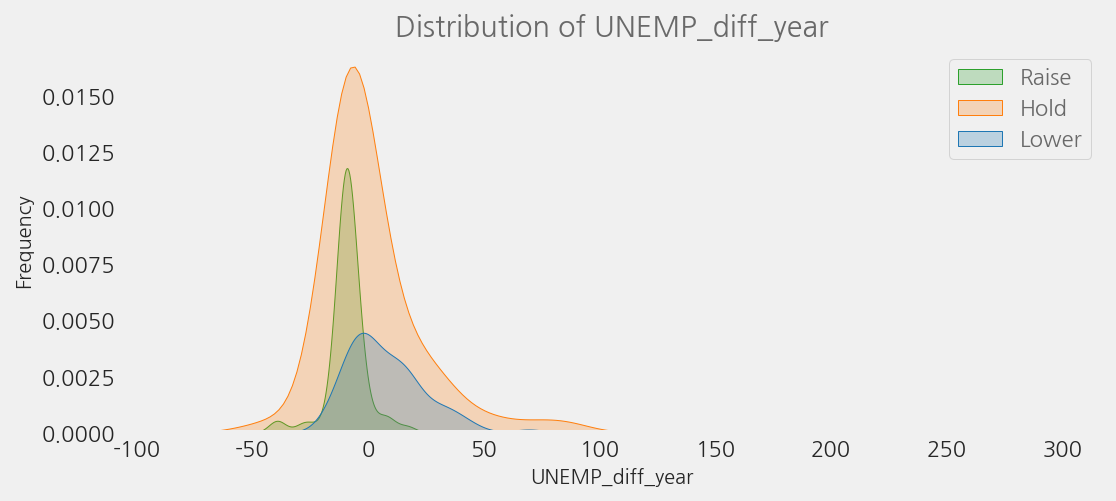

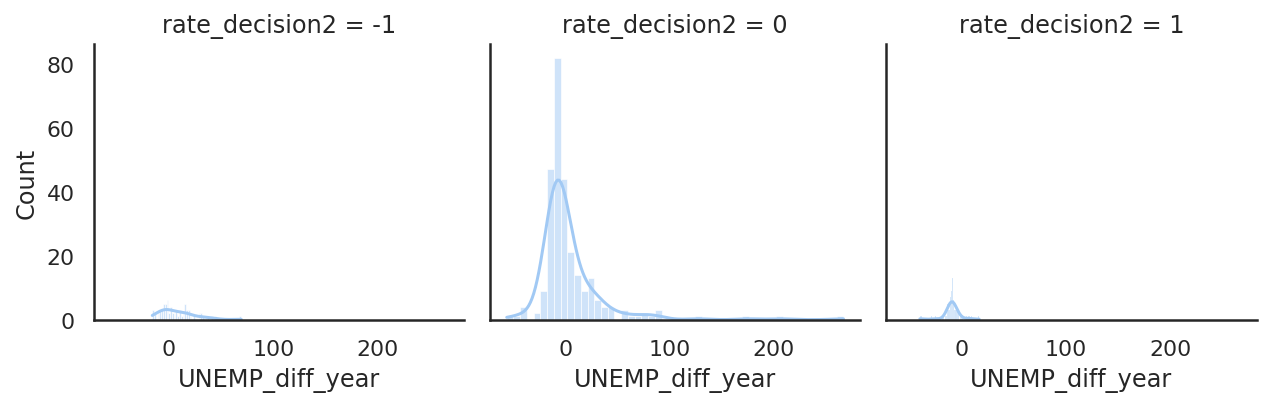

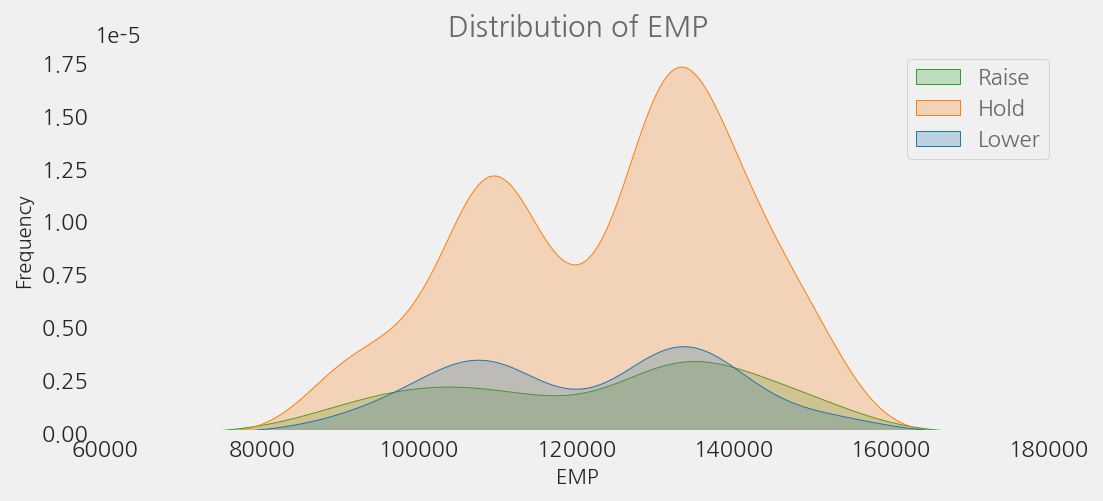

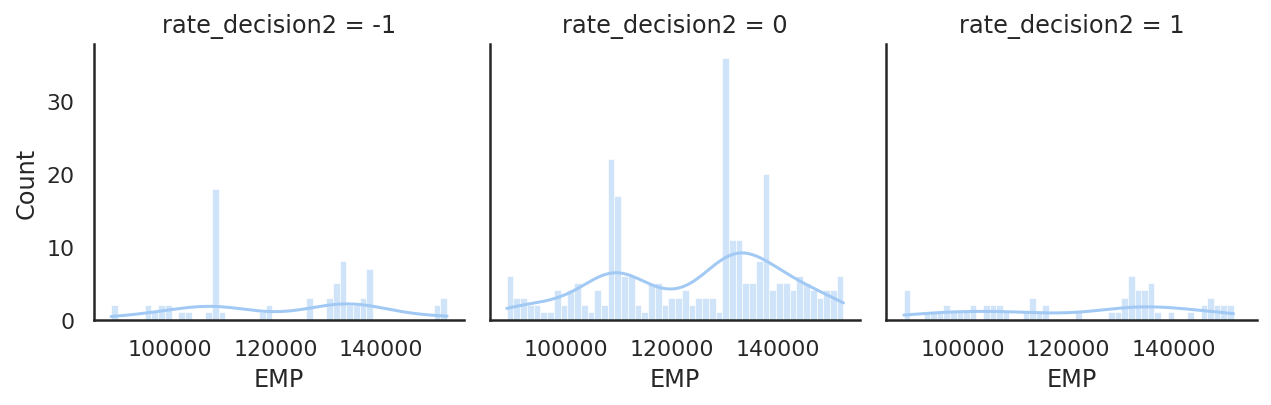

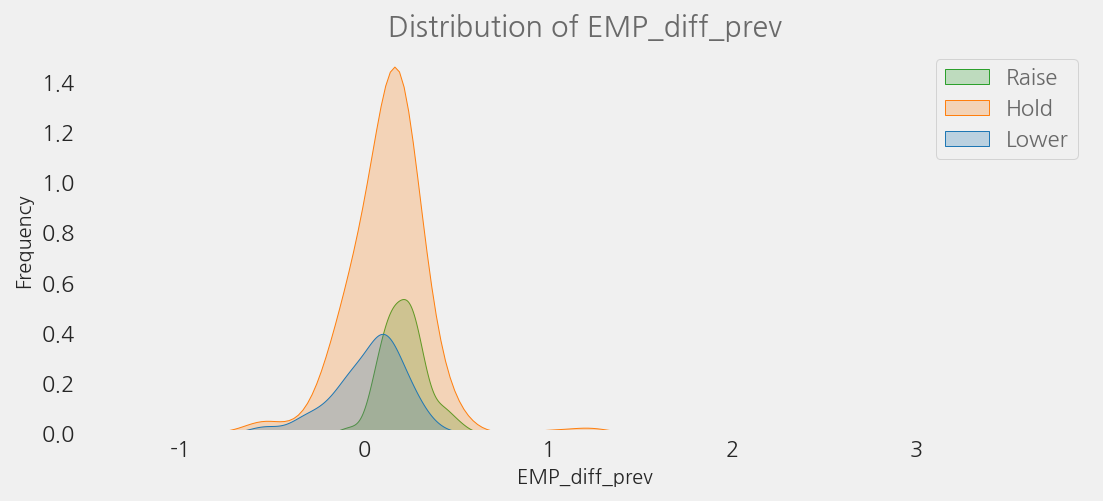

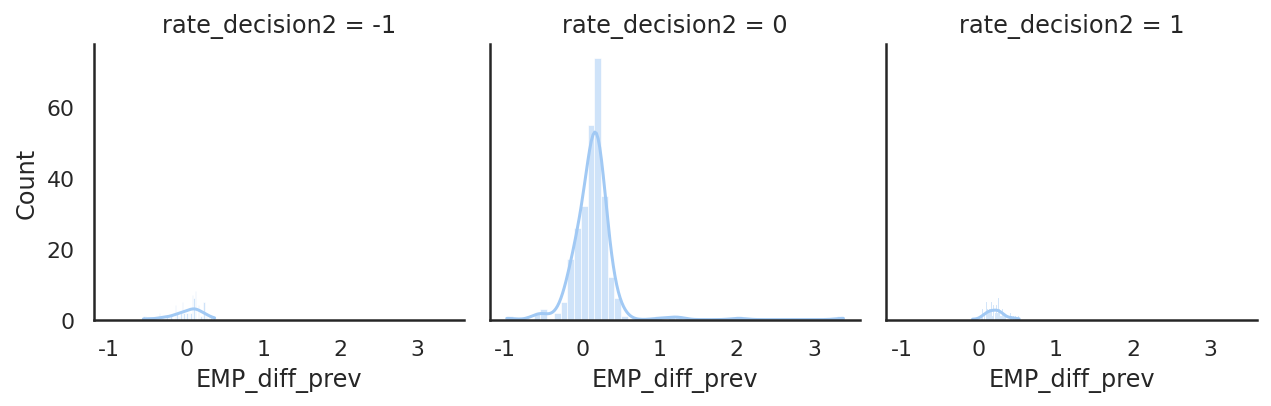

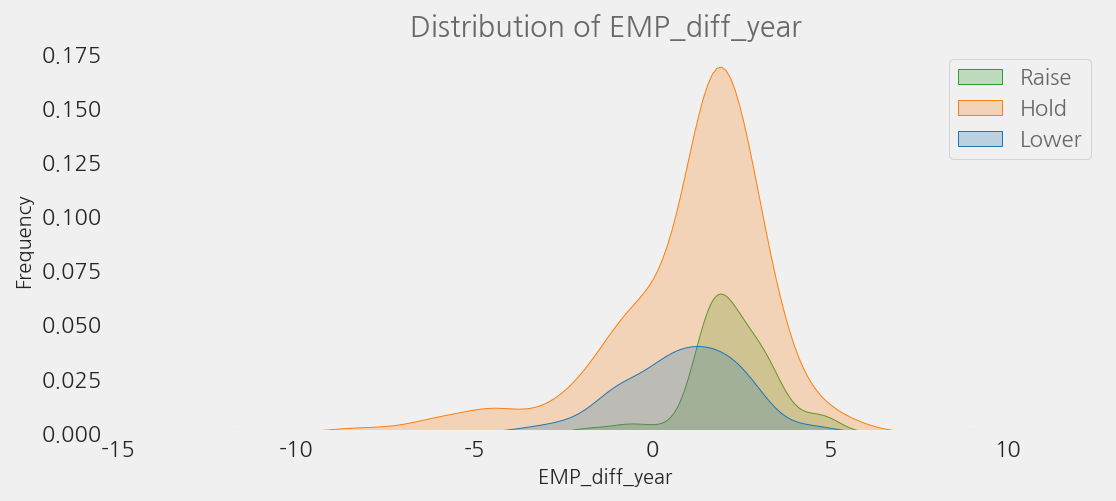

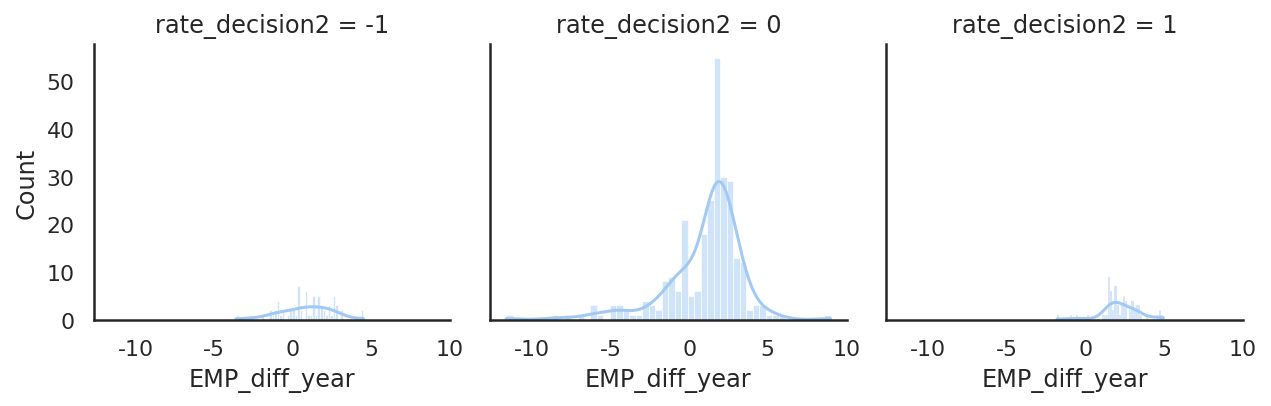

In [25]:
plot_distribution(
    econ_data,
    [
        "UNEMP",
        "UNEMP_diff_prev",
        "UNEMP_diff_year",
        "EMP",
        "EMP_diff_prev",
        "EMP_diff_year",
    ],
)


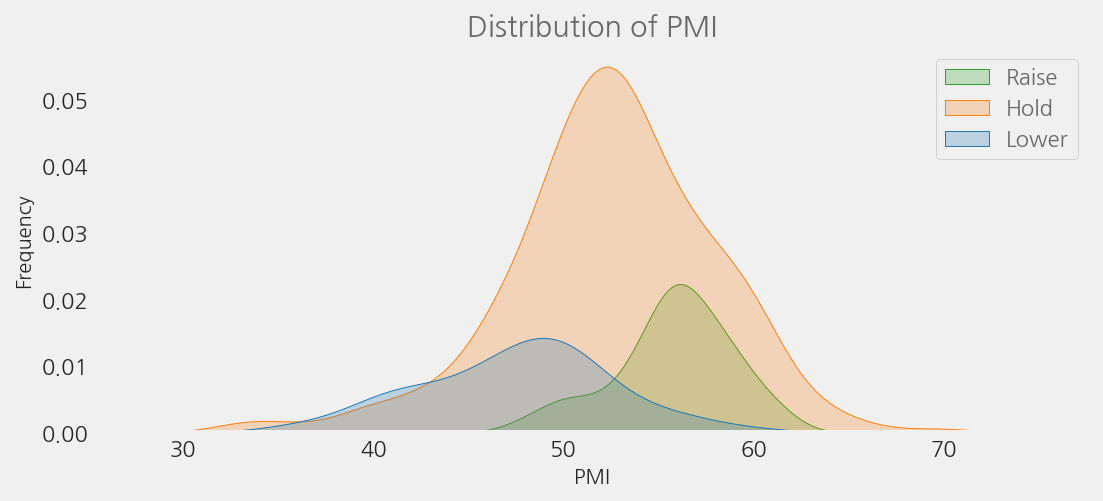

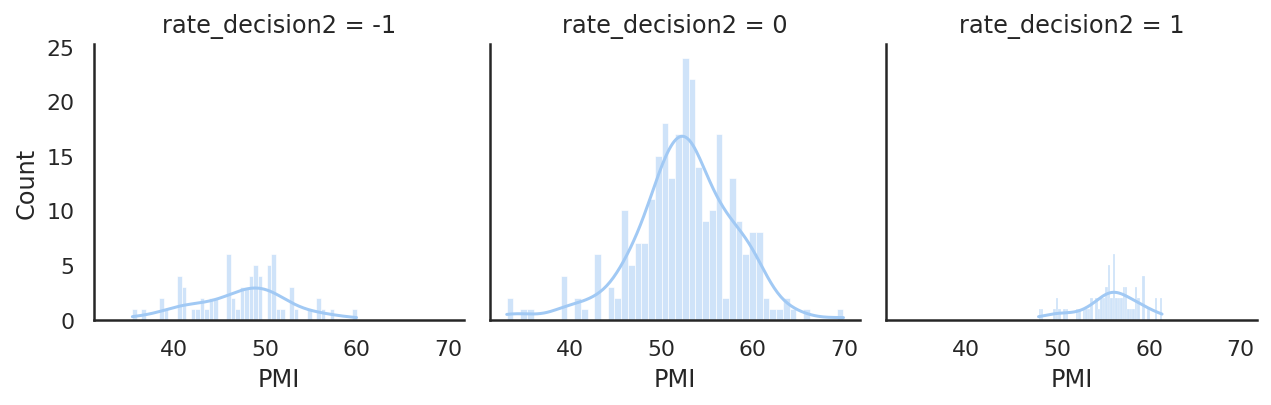

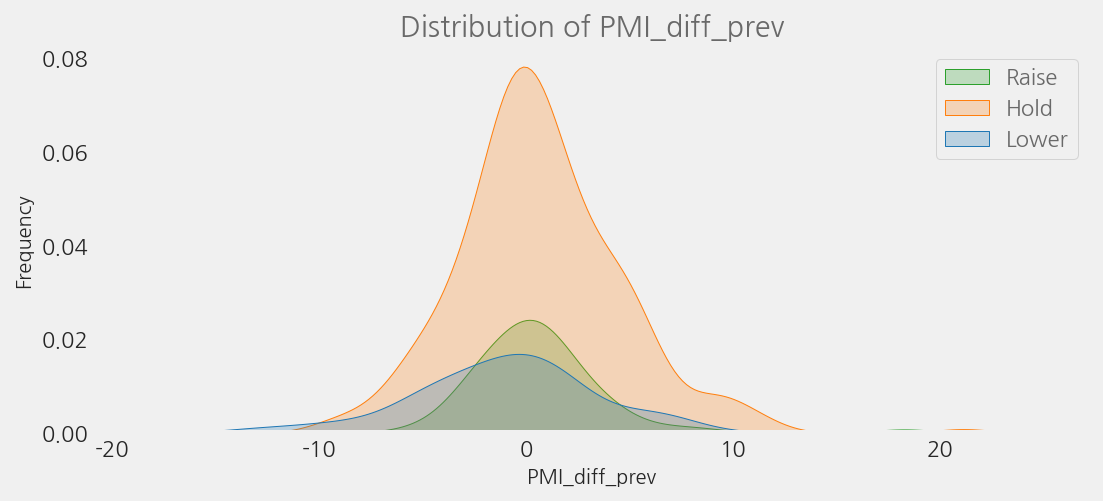

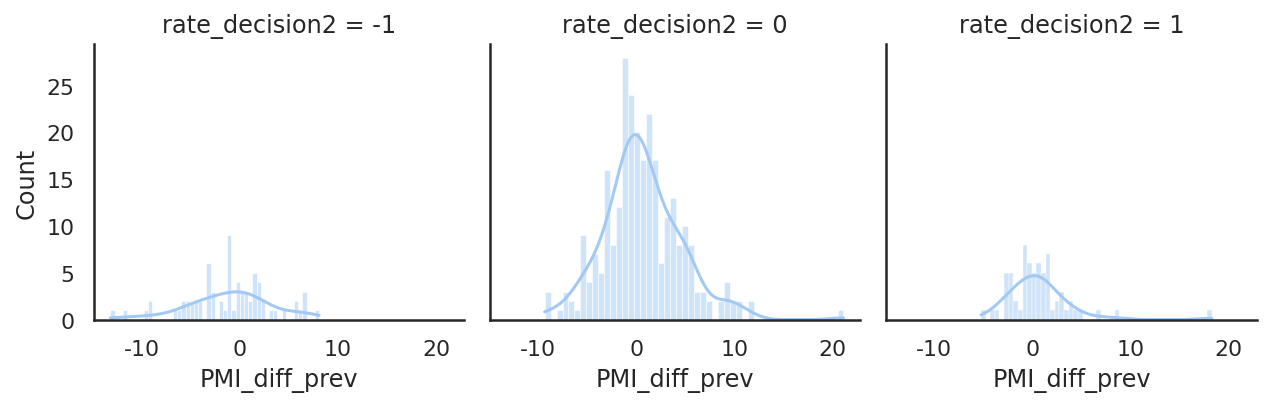

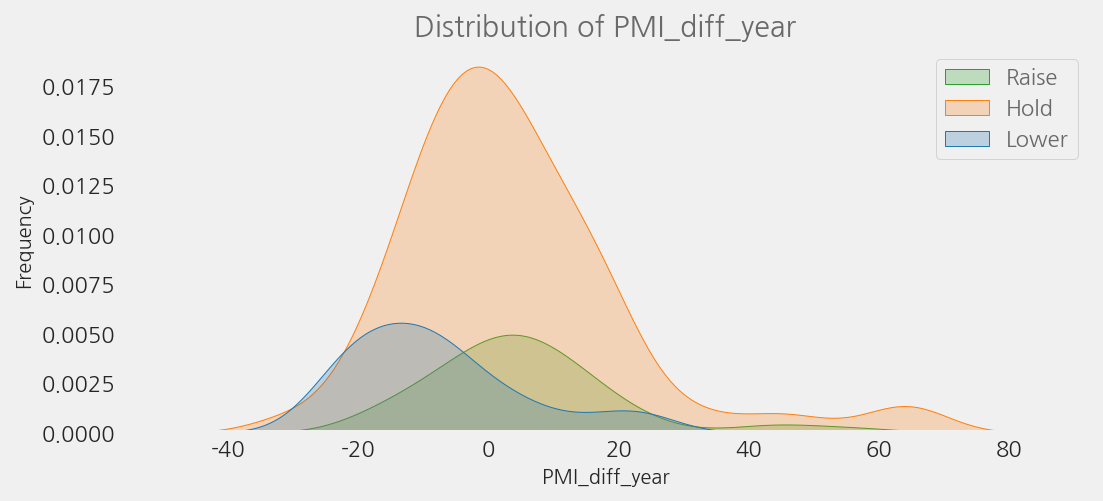

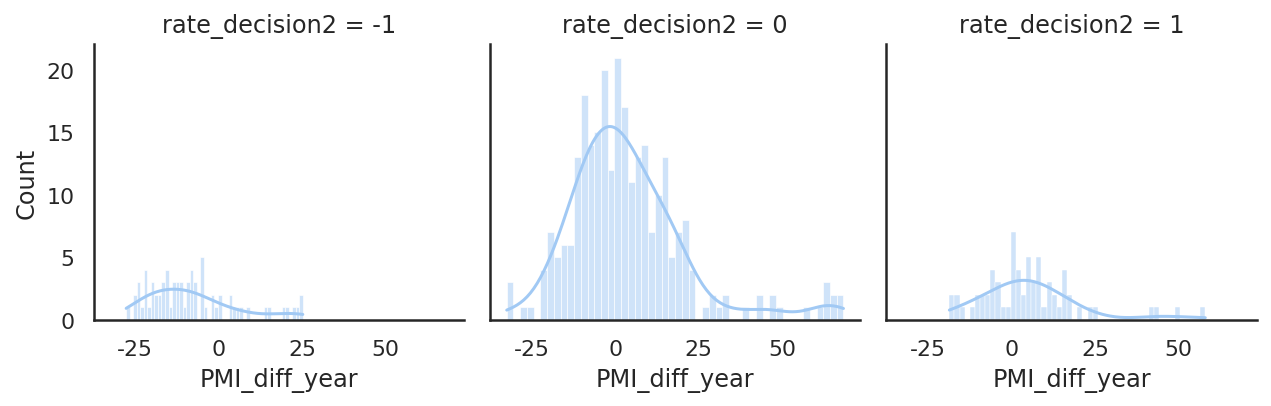

In [26]:
plot_distribution(econ_data, ["PMI", "PMI_diff_prev", "PMI_diff_year"])

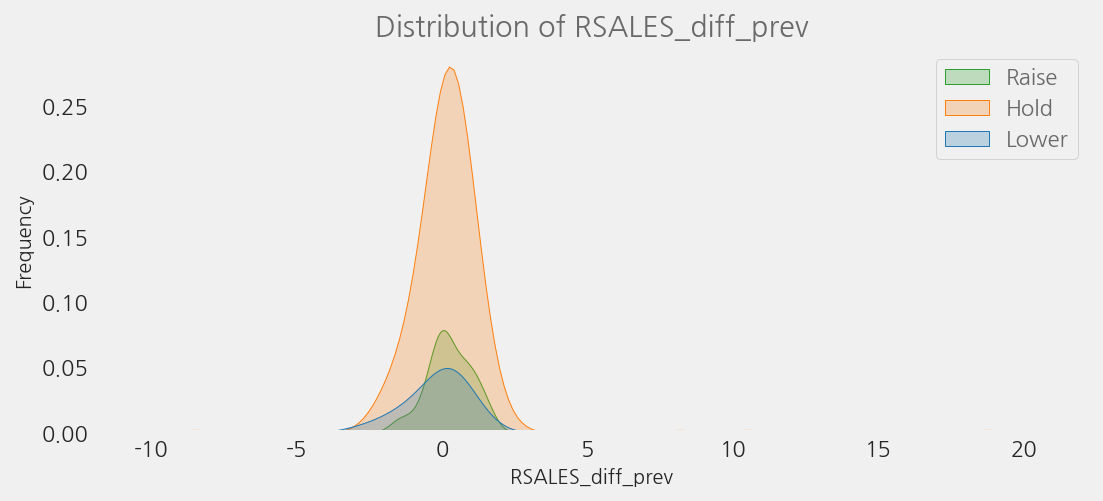

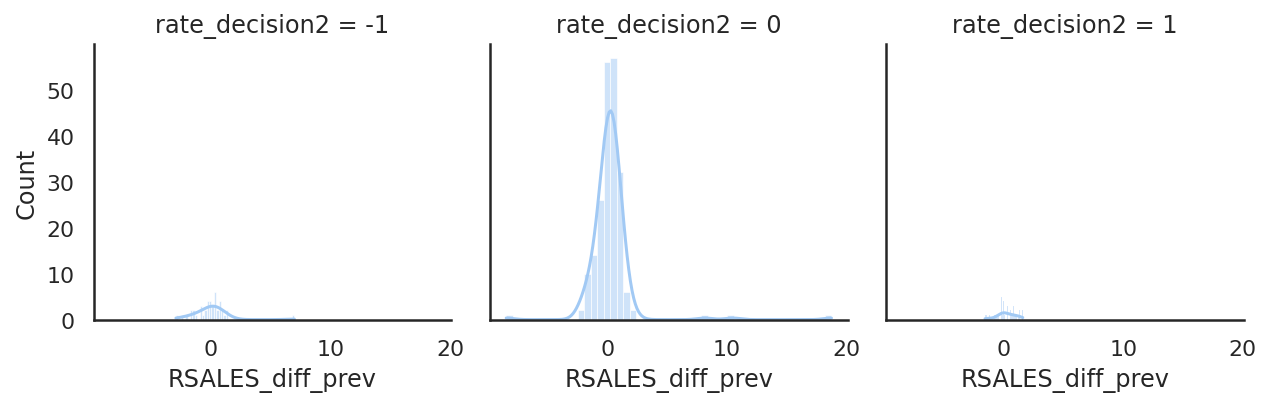

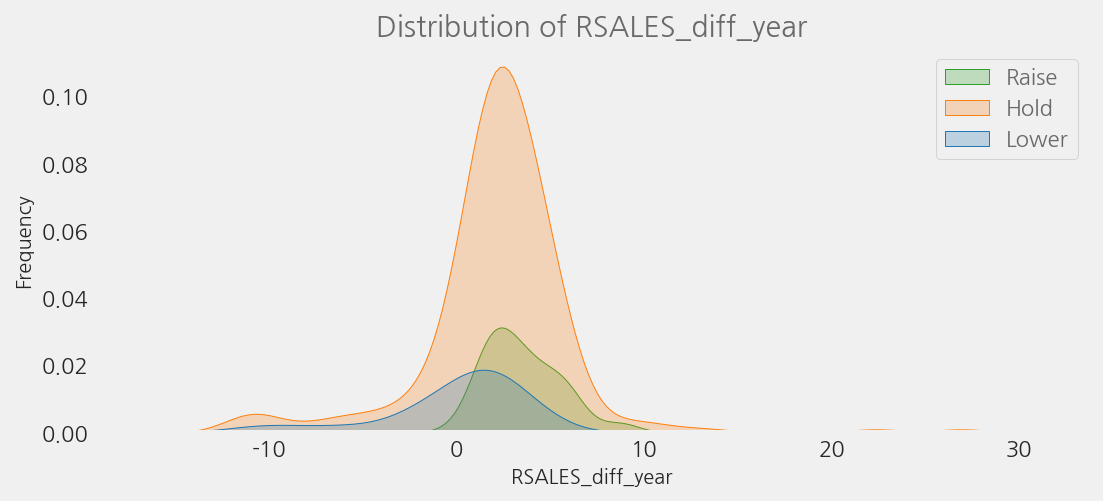

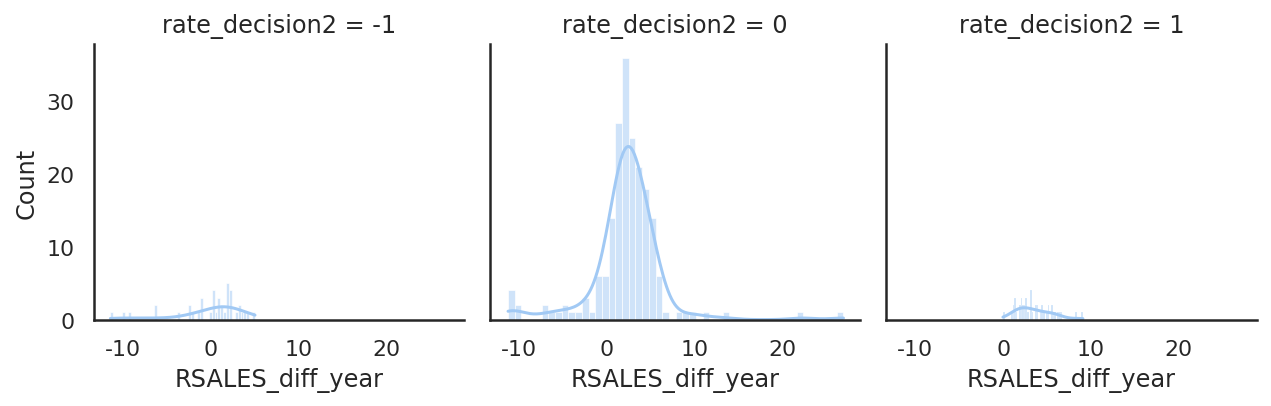

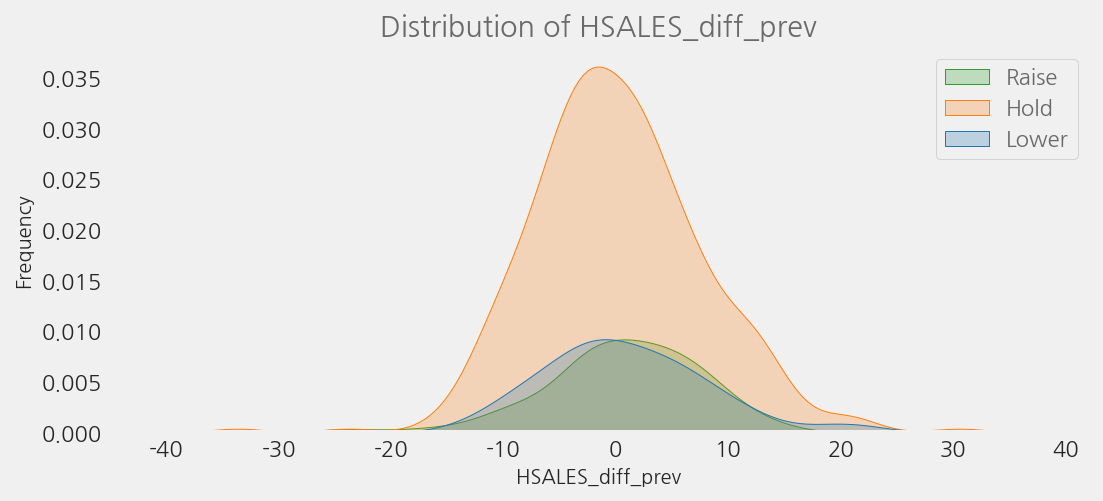

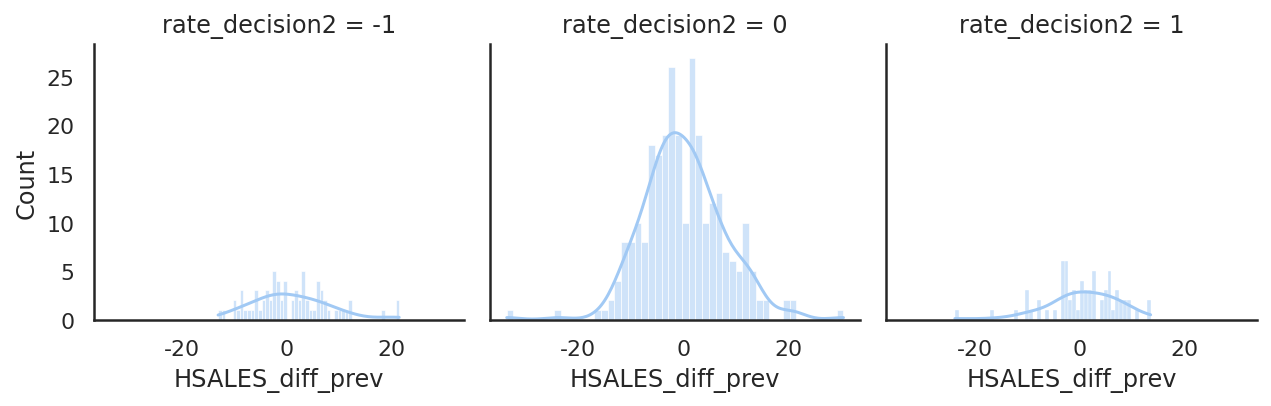

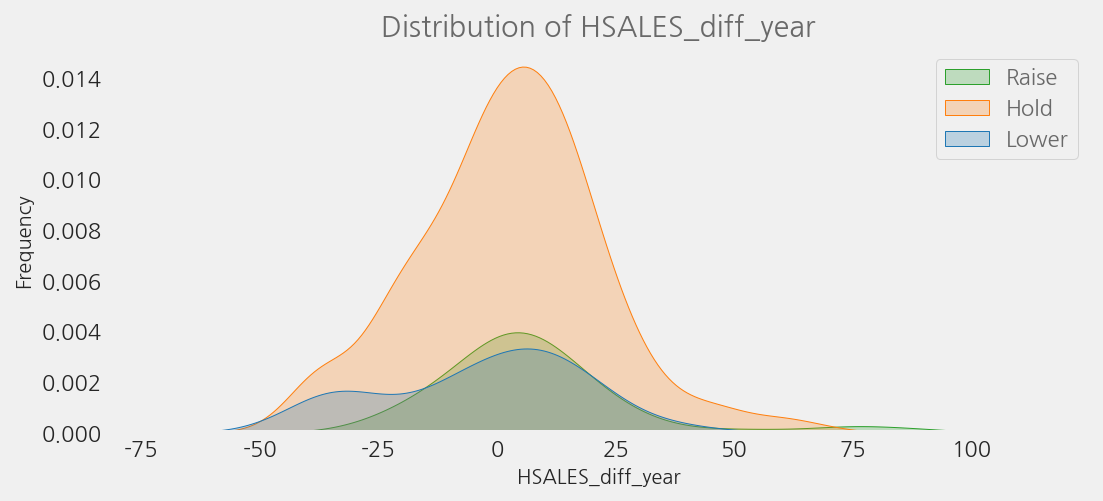

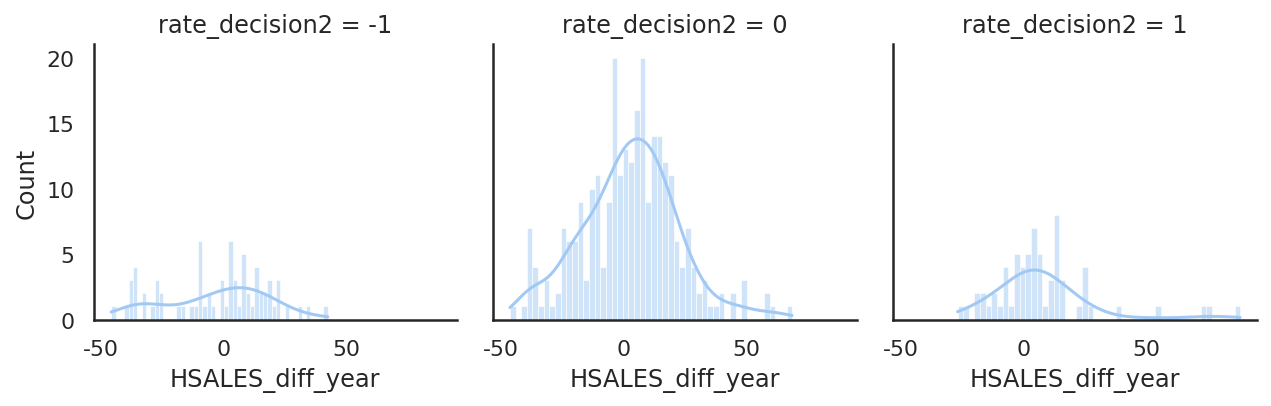

In [27]:
plot_distribution(
    econ_data,
    ["RSALES_diff_prev", "RSALES_diff_year", "HSALES_diff_prev", "HSALES_diff_year"],
)


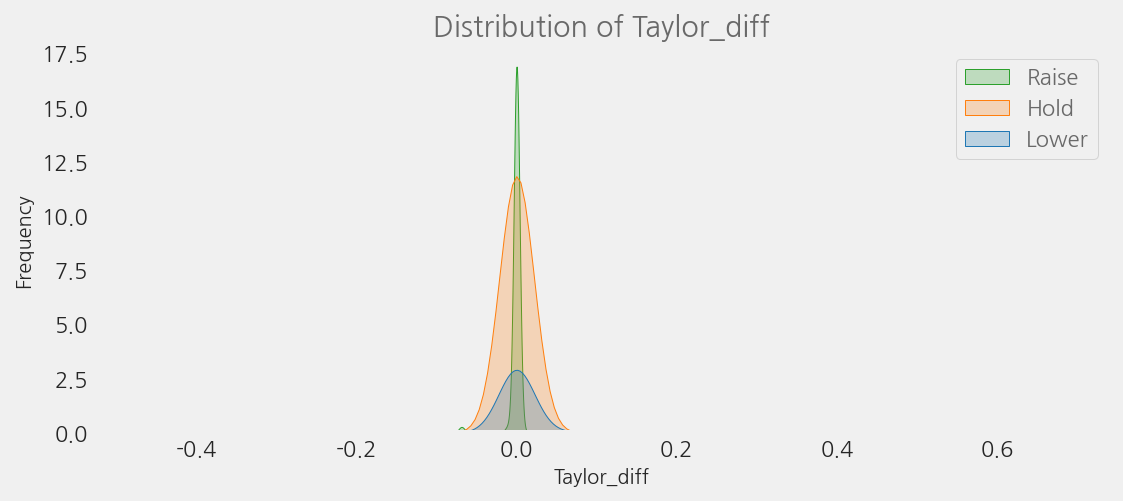

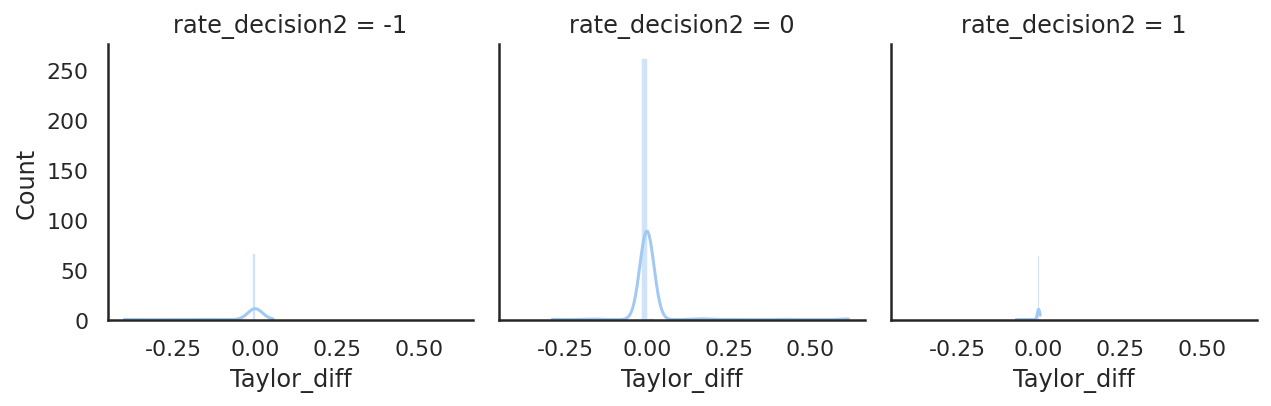

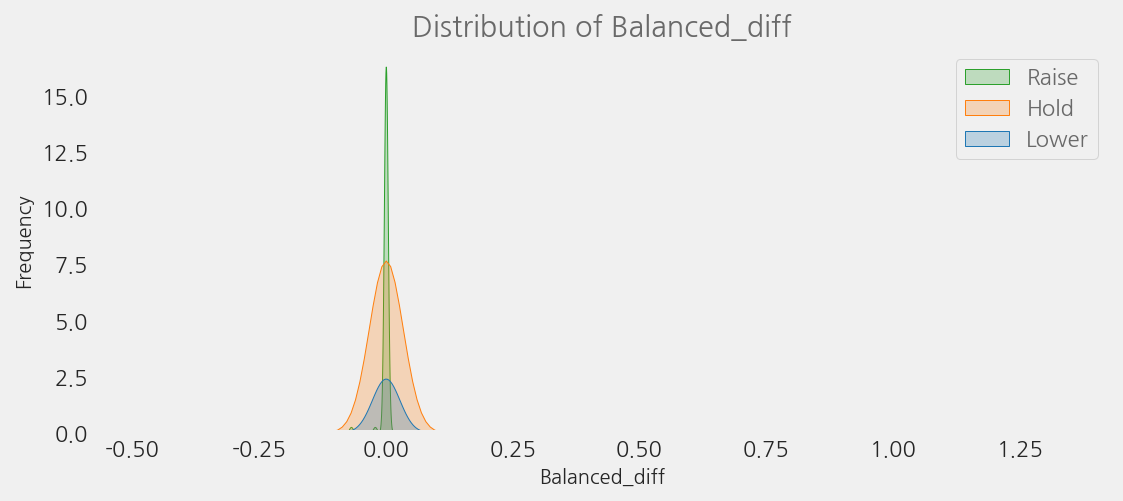

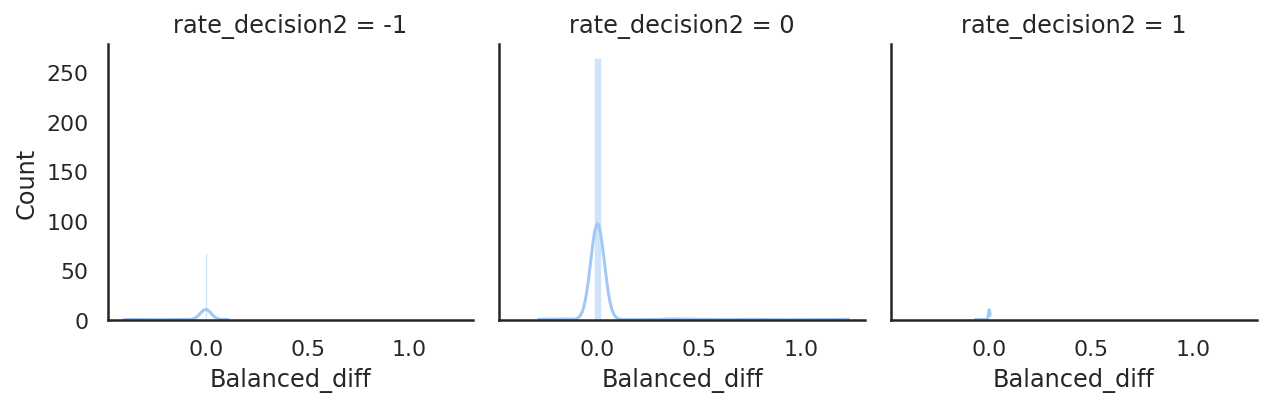

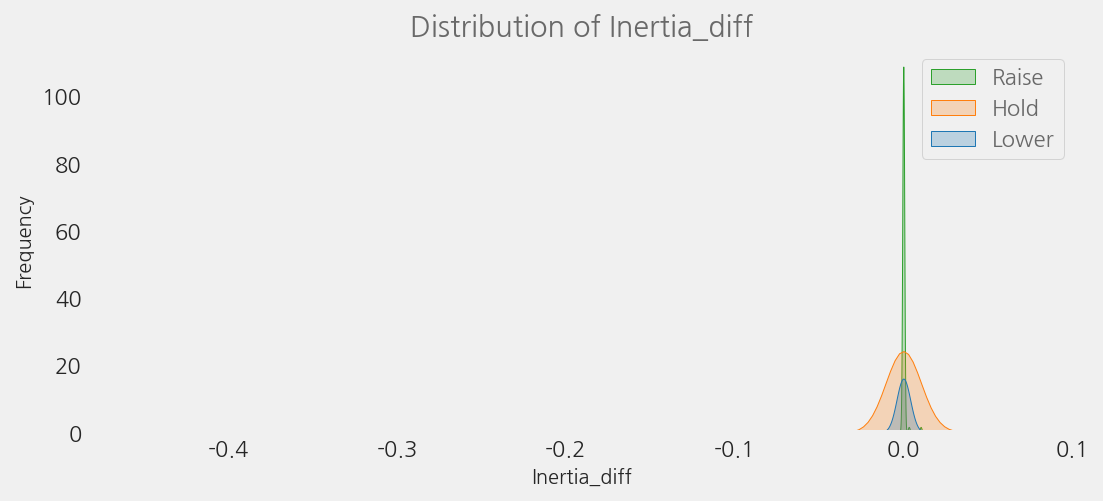

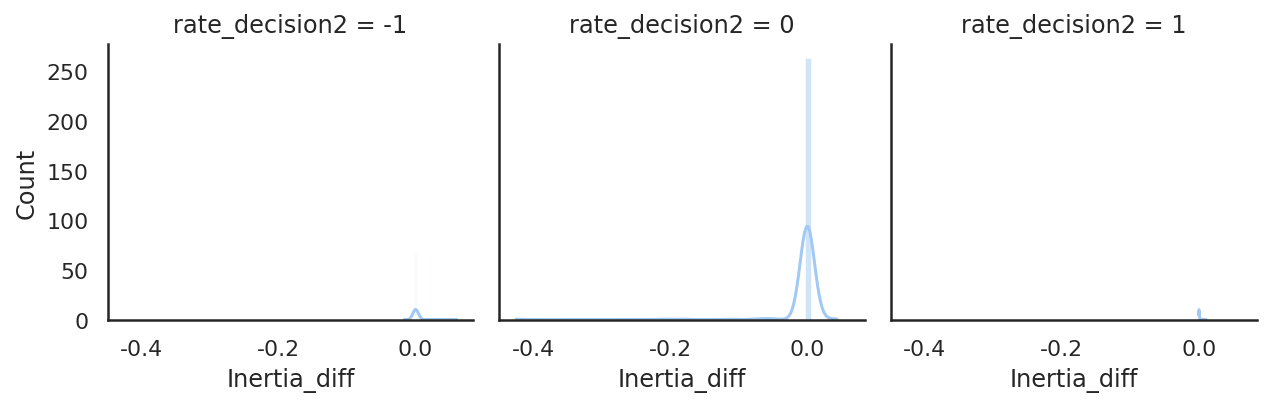

In [28]:
plot_distribution(econ_data, ["Taylor_diff", "Balanced_diff", "Inertia_diff"])

## Create Training Data Set


In [29]:
columns = [
    "rate_decision2",
    "prev_decision",
    "GDP_diff_prev",
    "PMI",
    "EMP_diff_prev",
    "RSALES_diff_year",
    "UNEMP_diff_prev",
    "HSALES_diff_year",
    "Inertia_diff",
    "Balanced_diff",
]

econ_train_small = econ_data.copy()[columns]
econ_train_small.rename(columns={"rate_decision2": "target"}, inplace=True)
print(econ_train_small.shape)
econ_train_small.tail()

(415, 10)


target  prev_decision  GDP_diff_prev   PMI  EMP_diff_prev  \
date                                                                    
2021-11-03       0            0.0       0.570948  60.5       0.288624   
2021-12-15       0            0.0       0.570948  60.6       0.437147   
2022-01-26       0            0.0       0.570948  58.8       0.395555   
2022-03-16       1            0.0       1.680778  58.6       0.476814   
2022-05-04       1            1.0      -0.355417  57.1       0.283658   

            RSALES_diff_year  UNEMP_diff_prev  HSALES_diff_year  Inertia_diff  \
date                                                                            
2021-11-03          8.474656        -9.615385        -26.135217           0.0   
2021-12-15         10.977142        -8.695652        -11.163337           0.0   
2022-01-26          9.101289        -7.142857         -3.673938           0.0   
2022-03-16          9.076698        -5.000000          3.125000           0.0   
2022-05-04         -0.034915         0.000000        -26.946848           0.0   

            Balanced_diff  
date                       
2021-11-03            0.0  
2021-12-15            0.0  
2022-01-26            0.0  
2022-03-16            0.0  
2022-05-04            0.0

In [30]:
# Large dataset
columns = [
    "rate_decision2",
    "prev_decision",
    "GDP_diff_prev",
    "GDP_diff_year",
    "GDPPOT_diff_prev",
    "GDPPOT_diff_year",
    "PCE_diff_prev",
    "PCE_diff_year",
    "CPI_diff_prev",
    "CPI_diff_year",
    "UNEMP",
    "UNEMP_diff_prev",
    "UNEMP_diff_year",
    "EMP",
    "EMP_diff_prev",
    "EMP_diff_year",
    "PMI",
    "PMI_diff_prev",
    "PMI_diff_year",
    "RSALES_diff_prev",
    "RSALES_diff_year",
    "HSALES_diff_prev",
    "HSALES_diff_year",
    "Taylor-Rate",
    "Balanced-Rate",
    "Inertia-Rate",
    "Taylor_diff",
    "Balanced_diff",
    "Inertia_diff",
]


econ_train_large = econ_data.copy()[columns]
econ_train_large.rename(columns={"rate_decision2": "target"}, inplace=True)
print(econ_train_large.shape)

(415, 29)


### Missing Values


In [31]:
# As most likely the decision is 0 (hold), fill prev_decision of the first row
econ_train_small["prev_decision"].fillna(0, inplace=True)
econ_train_large["prev_decision"].fillna(0, inplace=True)


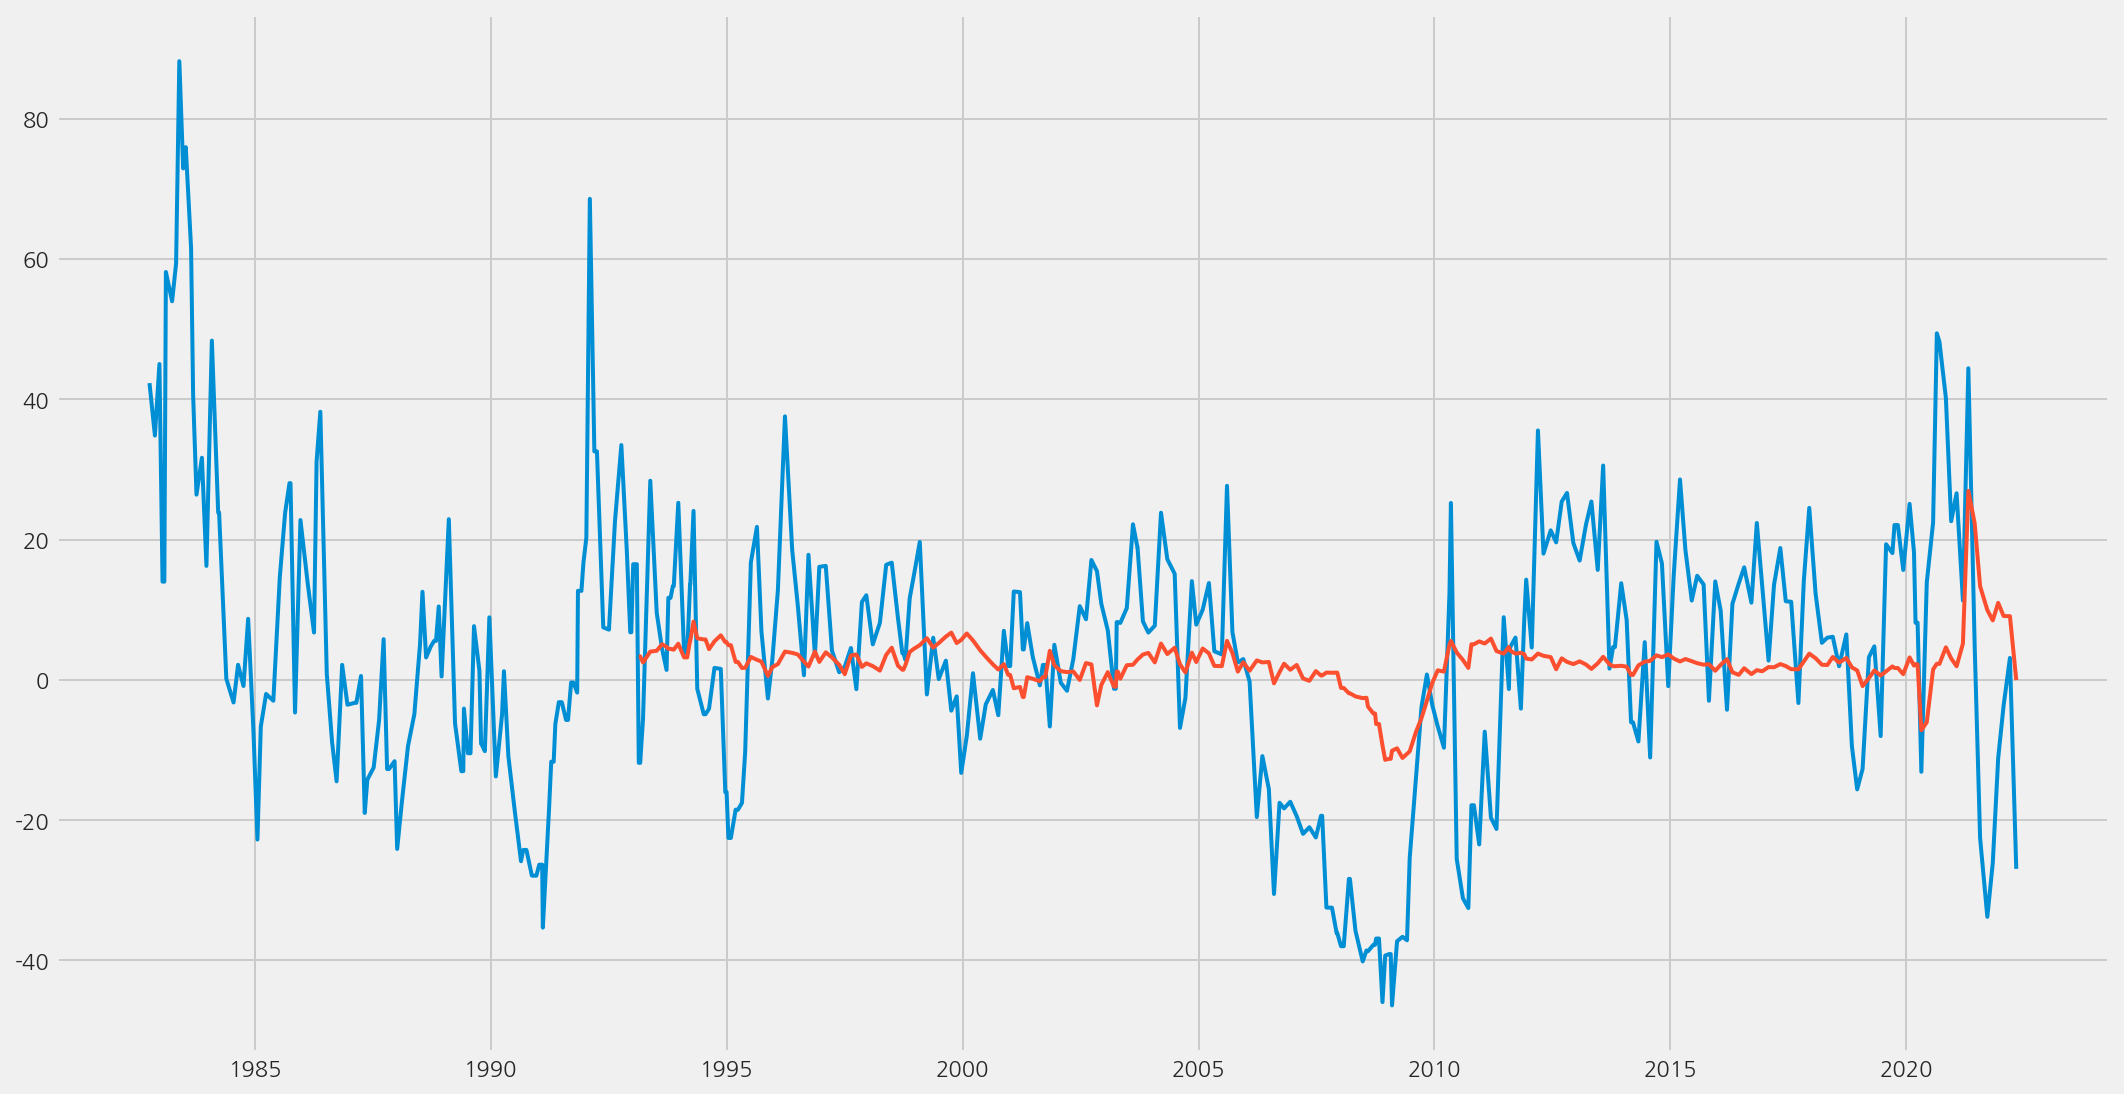

In [32]:
# ax.set_xlim(0, 400)
cfg = eKonf.compose(config_group="visualize/plot=lineplot")
cfg.figure.figsize = (15, 8)
cfg.lineplot.x = "date"
cfg.lineplot.y = "HSALES_diff_year"

lineplot = cfg.lineplot.copy()
lineplot.x = 'date'
lineplot.y = 'RSALES_diff_year'
cfg.plots.append(lineplot)

eKonf.instantiate(cfg, data=econ_train_small)

In [33]:
# Retail sales growth ratio is difficult to estimate. Though it is not ideal, simply use the average
econ_train_small["RSALES_diff_year"].fillna(
    econ_train_small["RSALES_diff_year"].mean(), inplace=True
)
econ_train_large["RSALES_diff_prev"].fillna(
    econ_train_large["RSALES_diff_prev"].mean(), inplace=True
)
econ_train_large["RSALES_diff_year"].fillna(
    econ_train_large["RSALES_diff_year"].mean(), inplace=True
)
econ_train_small["Inertia_diff"].fillna(
    econ_train_small["Inertia_diff"].mean(), inplace=True
)
econ_train_small["Balanced_diff"].fillna(
    econ_train_small["Balanced_diff"].mean(), inplace=True
)
econ_train_large["Inertia_diff"].fillna(
    econ_train_large["Inertia_diff"].mean(), inplace=True
)
econ_train_large["Balanced_diff"].fillna(
    econ_train_large["Balanced_diff"].mean(), inplace=True
)
econ_train_large["Taylor_diff"].fillna(
    econ_train_large["Taylor_diff"].mean(), inplace=True
)

### Save Data


In [34]:
save_dataframe(econ_train_small, output_file="econ_train_small.parquet")
save_dataframe(econ_train_large, output_file="econ_train_large.parquet")
